In [1]:
from sklearn.datasets import load_iris
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from dtreeviz import trees
from dtreeviz.models.spark_decision_tree import ShadowSparkTree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% 집에 가고싶다
내일 점심 뭐야?
계속 오타가 나
점심메뉴 추천좀

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
pd_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
pd_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [3]:
pd_df['target'] = iris['target']
pd_df                       

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [4]:
df = spark.createDataFrame(pd_df)
df

DataFrame[sepal length (cm): double, sepal width (cm): double, petal length (cm): double, petal width (cm): double, target: bigint]

In [5]:
df.show()

+-----------------+----------------+-----------------+----------------+------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|
+-----------------+----------------+-----------------+----------------+------+
|              5.1|             3.5|              1.4|             0.2|     0|
|              4.9|             3.0|              1.4|             0.2|     0|
|              4.7|             3.2|              1.3|             0.2|     0|
|              4.6|             3.1|              1.5|             0.2|     0|
|              5.0|             3.6|              1.4|             0.2|     0|
|              5.4|             3.9|              1.7|             0.4|     0|
|              4.6|             3.4|              1.4|             0.3|     0|
|              5.0|             3.4|              1.5|             0.2|     0|
|              4.4|             2.9|              1.4|             0.2|     0|
|              4.9|             3.1|              1.

In [6]:
df.schema

StructType(List(StructField(sepal length (cm),DoubleType,true),StructField(sepal width (cm),DoubleType,true),StructField(petal length (cm),DoubleType,true),StructField(petal width (cm),DoubleType,true),StructField(target,LongType,true)))

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
assembler = VectorAssembler(inputCols=['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'], outputCol = 'features')

asembler_df = assembler.transform(df)
asembler_df.show()

+-----------------+----------------+-----------------+----------------+------+-----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|         features|
+-----------------+----------------+-----------------+----------------+------+-----------------+
|              5.1|             3.5|              1.4|             0.2|     0|[5.1,3.5,1.4,0.2]|
|              4.9|             3.0|              1.4|             0.2|     0|[4.9,3.0,1.4,0.2]|
|              4.7|             3.2|              1.3|             0.2|     0|[4.7,3.2,1.3,0.2]|
|              4.6|             3.1|              1.5|             0.2|     0|[4.6,3.1,1.5,0.2]|
|              5.0|             3.6|              1.4|             0.2|     0|[5.0,3.6,1.4,0.2]|
|              5.4|             3.9|              1.7|             0.4|     0|[5.4,3.9,1.7,0.4]|
|              4.6|             3.4|              1.4|             0.3|     0|[4.6,3.4,1.4,0.3]|
|              5.0|           

In [9]:
(trainingData, testData) = asembler_df.randomSplit([0.8,0.2])

trainingData.show()

+-----------------+----------------+-----------------+----------------+------+-----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|         features|
+-----------------+----------------+-----------------+----------------+------+-----------------+
|              4.3|             3.0|              1.1|             0.1|     0|[4.3,3.0,1.1,0.1]|
|              4.4|             2.9|              1.4|             0.2|     0|[4.4,2.9,1.4,0.2]|
|              4.6|             3.1|              1.5|             0.2|     0|[4.6,3.1,1.5,0.2]|
|              4.6|             3.4|              1.4|             0.3|     0|[4.6,3.4,1.4,0.3]|
|              4.7|             3.2|              1.3|             0.2|     0|[4.7,3.2,1.3,0.2]|
|              4.8|             3.0|              1.4|             0.1|     0|[4.8,3.0,1.4,0.1]|
|              4.8|             3.4|              1.6|             0.2|     0|[4.8,3.4,1.6,0.2]|
|              4.9|           

In [10]:
testData.show()

+-----------------+----------------+-----------------+----------------+------+-----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|         features|
+-----------------+----------------+-----------------+----------------+------+-----------------+
|              4.9|             3.1|              1.5|             0.1|     0|[4.9,3.1,1.5,0.1]|
|              5.0|             3.4|              1.5|             0.2|     0|[5.0,3.4,1.5,0.2]|
|              5.1|             3.5|              1.4|             0.2|     0|[5.1,3.5,1.4,0.2]|
|              5.2|             3.4|              1.4|             0.2|     0|[5.2,3.4,1.4,0.2]|
|              5.2|             4.1|              1.5|             0.1|     0|[5.2,4.1,1.5,0.1]|
|              4.6|             3.2|              1.4|             0.2|     0|[4.6,3.2,1.4,0.2]|
|              5.5|             3.5|              1.3|             0.2|     0|[5.5,3.5,1.3,0.2]|
|              5.0|           

In [11]:
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'target')

rfModel = rf.fit(trainingData)
rfModel

RandomForestClassificationModel (uid=RandomForestClassifier_7a3634e83996) with 20 trees

In [12]:
prediction = rfModel.transform(testData)

prediction.show()

+-----------------+----------------+-----------------+----------------+------+-----------------+--------------------+--------------------+----------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|         features|       rawPrediction|         probability|prediction|
+-----------------+----------------+-----------------+----------------+------+-----------------+--------------------+--------------------+----------+
|              4.9|             3.1|              1.5|             0.1|     0|[4.9,3.1,1.5,0.1]|      [20.0,0.0,0.0]|       [1.0,0.0,0.0]|       0.0|
|              5.0|             3.4|              1.5|             0.2|     0|[5.0,3.4,1.5,0.2]|      [20.0,0.0,0.0]|       [1.0,0.0,0.0]|       0.0|
|              5.1|             3.5|              1.4|             0.2|     0|[5.1,3.5,1.4,0.2]|      [20.0,0.0,0.0]|       [1.0,0.0,0.0]|       0.0|
|              5.2|             3.4|              1.4|             0.2|     0|[5.2,3.4,1.4,0.2]|    

In [13]:
prediction['target','prediction'].show()

+------+----------+
|target|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       2.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     2|       2.0|
+------+----------+
only showing top 20 rows



In [14]:
right_predict = prediction.filter(prediction.target == prediction.prediction)

right_predict.show()

+-----------------+----------------+-----------------+----------------+------+-----------------+--------------------+--------------------+----------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|         features|       rawPrediction|         probability|prediction|
+-----------------+----------------+-----------------+----------------+------+-----------------+--------------------+--------------------+----------+
|              4.9|             3.1|              1.5|             0.1|     0|[4.9,3.1,1.5,0.1]|      [20.0,0.0,0.0]|       [1.0,0.0,0.0]|       0.0|
|              5.0|             3.4|              1.5|             0.2|     0|[5.0,3.4,1.5,0.2]|      [20.0,0.0,0.0]|       [1.0,0.0,0.0]|       0.0|
|              5.1|             3.5|              1.4|             0.2|     0|[5.1,3.5,1.4,0.2]|      [20.0,0.0,0.0]|       [1.0,0.0,0.0]|       0.0|
|              5.2|             3.4|              1.4|             0.2|     0|[5.2,3.4,1.4,0.2]|    

In [15]:
right_predict['target','prediction'].show()

+------+----------+
|target|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     2|       2.0|
|     2|       2.0|
+------+----------+
only showing top 20 rows



In [16]:
right_predict.count()

28

In [17]:
prediction.count()

31

In [18]:
right_predict.count() / prediction.count()

0.9032258064516129

In [19]:
trainingData['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'].show()

+-----------------+----------------+-----------------+----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|
+-----------------+----------------+-----------------+----------------+
|              4.3|             3.0|              1.1|             0.1|
|              4.4|             2.9|              1.4|             0.2|
|              4.6|             3.1|              1.5|             0.2|
|              4.6|             3.4|              1.4|             0.3|
|              4.7|             3.2|              1.3|             0.2|
|              4.8|             3.0|              1.4|             0.1|
|              4.8|             3.4|              1.6|             0.2|
|              4.9|             3.0|              1.4|             0.2|
|              5.0|             3.6|              1.4|             0.2|
|              5.1|             3.5|              1.4|             0.3|
|              5.4|             3.7|              1.5|          

In [20]:
trainingData[['target']].show()

+------+
|target|
+------+
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
+------+
only showing top 20 rows



In [21]:
rfModel.trees

[DecisionTreeClassificationModel (uid=dtc_66b1fa648ae8) of depth 5 with 11 nodes,
 DecisionTreeClassificationModel (uid=dtc_2f72f05d818b) of depth 5 with 13 nodes,
 DecisionTreeClassificationModel (uid=dtc_82aa85a4c154) of depth 2 with 5 nodes,
 DecisionTreeClassificationModel (uid=dtc_8681e3c8cb81) of depth 4 with 15 nodes,
 DecisionTreeClassificationModel (uid=dtc_b53a2f1e96a5) of depth 5 with 15 nodes,
 DecisionTreeClassificationModel (uid=dtc_db14139e3b96) of depth 5 with 15 nodes,
 DecisionTreeClassificationModel (uid=dtc_730f7ade5926) of depth 4 with 13 nodes,
 DecisionTreeClassificationModel (uid=dtc_f5c3f473fccd) of depth 4 with 11 nodes,
 DecisionTreeClassificationModel (uid=dtc_07b8f0001a0a) of depth 3 with 9 nodes,
 DecisionTreeClassificationModel (uid=dtc_1718351f62b6) of depth 4 with 11 nodes,
 DecisionTreeClassificationModel (uid=dtc_34489de49cd3) of depth 5 with 13 nodes,
 DecisionTreeClassificationModel (uid=dtc_5f6617374e7d) of depth 3 with 7 nodes,
 DecisionTreeClassi

In [22]:
print(rfModel.trees[0].toDebugString)

DecisionTreeClassificationModel (uid=dtc_66b1fa648ae8) of depth 5 with 11 nodes
  If (feature 2 <= 2.5999999999999996)
   Predict: 0.0
  Else (feature 2 > 2.5999999999999996)
   If (feature 2 <= 5.05)
    If (feature 3 <= 1.75)
     If (feature 3 <= 1.55)
      Predict: 1.0
     Else (feature 3 > 1.55)
      If (feature 0 <= 4.95)
       Predict: 2.0
      Else (feature 0 > 4.95)
       Predict: 1.0
    Else (feature 3 > 1.75)
     Predict: 2.0
   Else (feature 2 > 5.05)
    Predict: 2.0



In [23]:
trainingData.show()

+-----------------+----------------+-----------------+----------------+------+-----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|         features|
+-----------------+----------------+-----------------+----------------+------+-----------------+
|              4.3|             3.0|              1.1|             0.1|     0|[4.3,3.0,1.1,0.1]|
|              4.4|             2.9|              1.4|             0.2|     0|[4.4,2.9,1.4,0.2]|
|              4.6|             3.1|              1.5|             0.2|     0|[4.6,3.1,1.5,0.2]|
|              4.6|             3.4|              1.4|             0.3|     0|[4.6,3.4,1.4,0.3]|
|              4.7|             3.2|              1.3|             0.2|     0|[4.7,3.2,1.3,0.2]|
|              4.8|             3.0|              1.4|             0.1|     0|[4.8,3.0,1.4,0.1]|
|              4.8|             3.4|              1.6|             0.2|     0|[4.8,3.4,1.6,0.2]|
|              4.9|           

In [24]:
dataset = trainingData.toPandas()
dataset

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  4.3               3.0                1.1               0.1   
1                  4.4               2.9                1.4               0.2   
2                  4.6               3.1                1.5               0.2   
3                  4.6               3.4                1.4               0.3   
4                  4.7               3.2                1.3               0.2   
..                 ...               ...                ...               ...   
114                6.9               3.1                5.1               2.3   
115                6.9               3.1                5.4               2.1   
116                7.2               3.0                5.8               1.6   
117                7.4               2.8                6.1               1.9   
118                7.7               3.0                6.1               2.3   

     target              features  
0         0  [4.3, 3.0, 1.1, 0.1]  
1         0  [4.4, 2.9, 1.4, 0.2]  
2         0  [4.6, 3.1, 1.5, 0.2]  
3         0  [4.6, 3.4, 1.4, 0.3]  
4         0  [4.7, 3.2, 1.3, 0.2]  
..      ...                   ...  
114       2  [6.9, 3.1, 5.1, 2.3]  
115       2  [6.9, 3.1, 5.4, 2.1]  
116       2  [7.2, 3.0, 5.8, 1.6]  
117       2  [7.4, 2.8, 6.1, 1.9]  
118       2  [7.7, 3.0, 6.1, 2.3]  

[119 rows x 6 columns]

In [25]:
dataset = dataset[['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']]
dataset

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  4.3               3.0                1.1               0.1   
1                  4.4               2.9                1.4               0.2   
2                  4.6               3.1                1.5               0.2   
3                  4.6               3.4                1.4               0.3   
4                  4.7               3.2                1.3               0.2   
..                 ...               ...                ...               ...   
114                6.9               3.1                5.1               2.3   
115                6.9               3.1                5.4               2.1   
116                7.2               3.0                5.8               1.6   
117                7.4               2.8                6.1               1.9   
118                7.7               3.0                6.1               2.3   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
114       2  
115       2  
116       2  
117       2  
118       2  

[119 rows x 5 columns]

In [26]:
spark_dtree = ShadowSparkTree(rfModel.trees[0],
                             dataset[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']],
                             dataset["target"],
                             feature_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],
                             target_name = "target",
                             class_names = ['setosa','versicolor','virginica']
                             )

spark_dtree

In [27]:
import os

os.environ['PATH']+=os.pathsep+'C:/Program Files/Graphviz/bin'

os.environ['PATH']

'C:\\Users\\Admin\\anaconda3\\envs\\spark_env;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\mingw-w64\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\usr\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Scripts;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\bin;C:\\Users\\Admin\\anaconda3\\condabin;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\Intel\\WiFi\\bin;C:\\Program Files\\Common Files\\Intel\\WirelessCommon;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files (x86)\\NVIDIA Corp

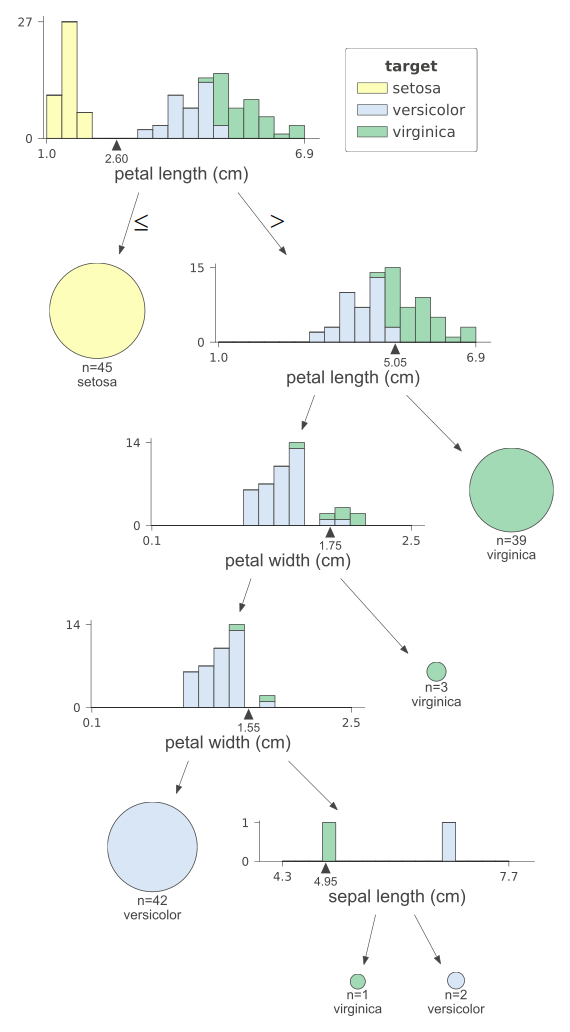

In [28]:
trees.dtreeviz(spark_dtree, scale=2.0)

## XGBoost를 이용한 유방암 데이터 분류

In [29]:
spark.sparkContext.addPyFile('pyspark-xgboost_0.90.zip')
import xgboost as xgb
from xgboost import plot_importance
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [30]:
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [31]:
X_features = dataset.data
X_features

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [32]:
y_label = dataset.target
y_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [33]:
feature_names = dataset.feature_names
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
cancer_df = pd.DataFrame(data=X_features)
cancer_df

0      1       2       3        4        5        6        7       8   \
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          9   ...      20     21      22      23       24       25      26  \
0    0.07871  ...  25.380  17.33  184.60  2019.0  0.16220  0.66560  0.7119   
1    0.05667  ...  24.990  23.41  158.80  1956.0  0.12380  0.18660  0.2416   
2    0.05999  ...  23.570  25.53  152.50  1709.0  0.14440  0.42450  0.4504   
3    0.09744  ...  14.910  26.50   98.87   567.7  0.20980  0.86630  0.6869   
4    0.05883  ...  22.540  16.67  152.20  1575.0  0.13740  0.20500  0.4000   
..       ...  ...     ...    ...     ...     ...      ...      ...     ...   
564  0.05623  ...  25.450  26.40  166.10  2027.0  0.14100  0.21130  0.4107   
565  0.05533  ...  23.690  38.25  155.00  1731.0  0.11660  0.19220  0.3215   
566  0.05648  ...  18.980  34.12  126.70  1124.0  0.11390  0.30940  0.3403   
567  0.07016  ...  25.740  39.42  184.60  1821.0  0.16500  0.86810  0.9387   
568  0.05884  ...   9.456  30.37   59.16   268.6  0.08996  0.06444  0.0000   

         27      28       29  
0    0.2654  0.4601  0.11890  
1    0.1860  0.2750  0.08902  
2    0.2430  0.3613  0.08758  
3    0.2575  0.6638  0.17300  
4    0.1625  0.2364  0.07678  
..      ...     ...      ...  
564  0.2216  0.2060  0.07115  
565  0.1628  0.2572  0.06637  
566  0.1418  0.2218  0.07820  
567  0.2650  0.4087  0.12400  
568  0.0000  0.2871  0.07039  

[569 rows x 30 columns]

In [35]:
cancer_df.columns = feature_names
cancer_df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [36]:
cancer_df['target']= y_label
cancer_df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

In [37]:
cancer_df.isnull()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          False         False           False      False            False   
1          False         False           False      False            False   
2          False         False           False      False            False   
3          False         False           False      False            False   
4          False         False           False      False            False   
..           ...           ...             ...        ...              ...   
564        False         False           False      False            False   
565        False         False           False      False            False   
566        False         False           False      False            False   
567        False         False           False      False            False   
568        False         False           False      False            False   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0               False           False                False          False   
1               False           False                False          False   
2               False           False                False          False   
3               False           False                False          False   
4               False           False                False          False   
..                ...             ...                  ...            ...   
564             False           False                False          False   
565             False           False                False          False   
566             False           False                False          False   
567             False           False                False          False   
568             False           False                False          False   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                     False  ...          False            False       False   
1                     False  ...          False            False       False   
2                     False  ...          False            False       False   
3                     False  ...          False            False       False   
4                     False  ...          False            False       False   
..                      ...  ...            ...              ...         ...   
564                   False  ...          False            False       False   
565                   False  ...          False            False       False   
566                   False  ...          False            False       False   
567                   False  ...          False            False       False   
568                   False  ...          False            False       False   

     worst smoothness  worst compactness  worst concavity  \
0               False              False            False   
1               False              False            False   
2               False              False            False   
3               False              False            False   
4               False              False            False   
..                ...                ...              ...   
564             False              False            False   
565             False              False            False   
566             False              False            False   
567             False              False            False   
568             False              False            False   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                   False           False                    False   False  
1                   False           False                    False   False  
2                   False           False                    False   False  
3                   False           False                    False   False  
4                   False           False                    Fal

In [38]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [39]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=1772)

In [74]:
X_train

array([[8.950e+00, 1.576e+01, 5.874e+01, ..., 3.846e-02, 1.652e-01,
        7.722e-02],
       [1.128e+01, 1.339e+01, 7.300e+01, ..., 8.611e-02, 2.102e-01,
        6.784e-02],
       [1.377e+01, 2.229e+01, 9.063e+01, ..., 1.673e-01, 3.080e-01,
        9.333e-02],
       ...,
       [8.734e+00, 1.684e+01, 5.527e+01, ..., 0.000e+00, 2.445e-01,
        8.865e-02],
       [1.460e+01, 2.329e+01, 9.397e+01, ..., 1.359e-01, 2.477e-01,
        6.836e-02],
       [1.246e+01, 2.404e+01, 8.397e+01, ..., 2.210e-01, 4.366e-01,
        2.075e-01]])

In [75]:
X_test

array([[1.166e+01, 1.707e+01, 7.370e+01, ..., 4.262e-02, 2.731e-01,
        6.825e-02],
       [2.175e+01, 2.099e+01, 1.473e+02, ..., 1.841e-01, 2.833e-01,
        8.858e-02],
       [1.464e+01, 1.524e+01, 9.577e+01, ..., 1.397e-01, 3.151e-01,
        8.473e-02],
       ...,
       [1.231e+01, 1.652e+01, 7.919e+01, ..., 8.660e-02, 2.618e-01,
        7.609e-02],
       [1.286e+01, 1.800e+01, 8.319e+01, ..., 7.926e-02, 2.779e-01,
        7.918e-02],
       [1.189e+01, 2.117e+01, 7.639e+01, ..., 8.263e-02, 3.075e-01,
        7.351e-02]])

In [76]:
y_train

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [77]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1])

In [78]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(n_estimators=10)
xgboost

XGBClassifier(n_estimators=10)

In [91]:
from sklearn.model_selection import GridSearchCV

In [94]:
xgb_clf = XGBClassifier(n_estimators=100)

In [95]:
params = {'max_depth':[5,7,9],
         'min_child_weight':[1,3,5,7],
         'colsample_bytree':[0.1,0.3,0.5,0.75,1.0],
         'learning_rate':[0.0001,0.001,0.01,0.1,0.2,0.3]}

In [96]:
gridcv = GridSearchCV(xgb_clf, param_grid=params)

In [106]:
gridcv.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='error')

[0]	validation_0-error:0.149123
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.114035
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.052632
[30]	validation_0-erro

[51]	validation_0-error:0.061404
[52]	validation_0-error:0.061404
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-erro

[2]	validation_0-error:0.096491
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.096491
[5]	validation_0-error:0.087719
[6]	validation_0-error:0.070175
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.070175
[30]	validation_0-error:0.070175
[31]	validation_0-error:0.061404
[32]	validation_0-error

[53]	validation_0-error:0.052632
[54]	validation_0-error:0.061404
[55]	validation_0-error:0.061404
[56]	validation_0-error:0.061404
[57]	validation_0-error:0.061404
[58]	validation_0-error:0.061404
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	valid

[3]	validation_0-error:0.096491
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.078947
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.061404
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.070175
[25]	validation_0-error:0.070175
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.070175
[33]	validation_0-error:

[54]	validation_0-error:0.061404
[55]	validation_0-error:0.061404
[56]	validation_0-error:0.061404
[57]	validation_0-error:0.061404
[58]	validation_0-error:0.061404
[59]	validation_0-error:0.061404
[60]	validation_0-error:0.061404
[61]	validation_0-error:0.061404
[62]	validation_0-error:0.061404
[63]	validation_0-error:0.061404
[64]	validation_0-error:0.061404
[65]	validation_0-error:0.061404
[66]	validation_0-error:0.061404
[67]	validation_0-error:0.061404
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.070175
[82]	validation_0-error:0.070175
[83]	validation_0-error:0.061404
[84]	valid

[5]	validation_0-error:0.087719
[6]	validation_0-error:0.087719
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.070175
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.061404
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.070175
[27]	validation_0-error:0.070175
[28]	validation_0-error:0.070175
[29]	validation_0-error:0.070175
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.078947
[32]	validation_0-error:0.078947
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-

[56]	validation_0-error:0.061404
[57]	validation_0-error:0.061404
[58]	validation_0-error:0.061404
[59]	validation_0-error:0.061404
[60]	validation_0-error:0.061404
[61]	validation_0-error:0.061404
[62]	validation_0-error:0.061404
[63]	validation_0-error:0.061404
[64]	validation_0-error:0.061404
[65]	validation_0-error:0.061404
[66]	validation_0-error:0.061404
[67]	validation_0-error:0.061404
[68]	validation_0-error:0.061404
[69]	validation_0-error:0.061404
[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	valid

[6]	validation_0-error:0.061404
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-err

[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.052632
[87]	validation_0-e

[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.070175
[30]	validation_0-error:0.070175
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.070175
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation

[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	valid

[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.070175
[25]	validation_0-error:0.070175
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.061404
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.070175
[36]	validation_0-error:0.070175
[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0

[61]	validation_0-error:0.061404
[62]	validation_0-error:0.061404
[63]	validation_0-error:0.061404
[64]	validation_0-error:0.061404
[65]	validation_0-error:0.061404
[66]	validation_0-error:0.061404
[67]	validation_0-error:0.061404
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.070175
[82]	validation_0-error:0.070175
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	valid

[12]	validation_0-error:0.035088
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.061404
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.070175
[27]	validation_0-error:0.070175
[28]	validation_0-error:0.070175
[29]	validation_0-error:0.070175
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.078947
[32]	validation_0-error:0.078947
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.061404
[36]	validation_0-error:0.061404
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validati

[63]	validation_0-error:0.061404
[64]	validation_0-error:0.061404
[65]	validation_0-error:0.061404
[66]	validation_0-error:0.061404
[67]	validation_0-error:0.061404
[68]	validation_0-error:0.061404
[69]	validation_0-error:0.061404
[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	valid

[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validatio

[64]	validation_0-error:0.04386
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	valida

[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.061404
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.070175
[30]	validation_0-error:0.070175
[31]	validation_0-error:0.070175
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.070175
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	valid

[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.052632
[95]	valida

[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.070175
[25]	validation_0-error:0.070175
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.061404
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.070175
[36]	validation_0-error:0.070175
[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validat

[67]	validation_0-error:0.061404
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.070175
[82]	validation_0-error:0.070175
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	valid

[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.061404
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.070175
[27]	validation_0-error:0.070175
[28]	validation_0-error:0.070175
[29]	validation_0-error:0.070175
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.078947
[32]	validation_0-error:0.078947
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.061404
[36]	validation_0-error:0.061404
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.061404
[44]	validation_0-error:0.061404
[45]	validation_0-error:0.061404
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.061404
[48]	validation_0-error:0.061404
[49]	valid

[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	validation_0-error:0.061404
[99]	validation_0-error:0.061404
[0]	valida

[20]	validation_0-error:0.04386
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	valida

[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.052632
[98]	validation_0-error:0.052632
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.157895
[1]	validation_0-error:0.096

[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.070175
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.070175
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.061404
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	valid

[72]	validation_0-error:0.052632
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.114035
[2]	validation_0-e

[23]	validation_0-error:0.061404
[24]	validation_0-error:0.070175
[25]	validation_0-error:0.070175
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.061404
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.070175
[36]	validation_0-error:0.070175
[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	valid

[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.087719
[4]	validation_0

[26]	validation_0-error:0.070175
[27]	validation_0-error:0.070175
[28]	validation_0-error:0.070175
[29]	validation_0-error:0.070175
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.070175
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.061404
[36]	validation_0-error:0.061404
[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.061404
[44]	validation_0-error:0.061404
[45]	validation_0-error:0.061404
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.061404
[48]	validation_0-error:0.061404
[49]	validation_0-error:0.061404
[50]	validation_0-error:0.061404
[51]	validation_0-error:0.061404
[52]	validation_0-error:0.061404
[53]	validation_0-error:0.061404
[54]	validation_0-error:0.061404
[55]	validation_0-error:0.061404
[56]	valid

[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	validation_0-error:0.061404
[99]	validation_0-error:0.061404
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.114035
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.061404
[7]	validation_0-

[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	valid

[78]	validation_0-error:0.061404
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.052632
[98]	validation_0-error:0.052632
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.157895
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-error:

[29]	validation_0-error:0.070175
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.070175
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.061404
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.061404
[54]	validation_0-error:0.061404
[55]	validation_0-error:0.061404
[56]	validation_0-error:0.061404
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	valid

[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.114035
[2]	validation_0-error:0.105263
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:

[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.061404
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.070175
[36]	validation_0-error:0.070175
[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	valid

[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.070175
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error

[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.061404
[36]	validation_0-error:0.061404
[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.061404
[44]	validation_0-error:0.061404
[45]	validation_0-error:0.061404
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.061404
[48]	validation_0-error:0.061404
[49]	validation_0-error:0.061404
[50]	validation_0-error:0.061404
[51]	validation_0-error:0.061404
[52]	validation_0-error:0.061404
[53]	validation_0-error:0.061404
[54]	validation_0-error:0.061404
[55]	validation_0-error:0.061404
[56]	validation_0-error:0.061404
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.061404
[59]	validation_0-error:0.061404
[60]	validation_0-error:0.061404
[61]	validation_0-error:0.061404
[62]	validation_0-error:0.061404
[63]	valid

[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	validation_0-error:0.061404
[99]	validation_0-error:0.061404
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.114035
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.061404
[14]	validation_0-error:

[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	valid

[85]	validation_0-error:0.04386
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.052632
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.157895
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386

[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.061404
[54]	validation_0-error:0.061404
[55]	validation_0-error:0.061404
[56]	validation_0-error:0.061404
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.061404
[63]	validation_0-error:0.061404
[64]	validation_0-error:0.061404
[65]	validation_0-error:0.061404
[66]	valid

[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.114035
[2]	validation_0-error:0.105263
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.0438

[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	valid

[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.070175
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.0

[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.061404
[44]	validation_0-error:0.061404
[45]	validation_0-error:0.061404
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.061404
[48]	validation_0-error:0.061404
[49]	validation_0-error:0.061404
[50]	validation_0-error:0.061404
[51]	validation_0-error:0.061404
[52]	validation_0-error:0.061404
[53]	validation_0-error:0.061404
[54]	validation_0-error:0.061404
[55]	validation_0-error:0.061404
[56]	validation_0-error:0.061404
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.061404
[59]	validation_0-error:0.061404
[60]	validation_0-error:0.061404
[61]	validation_0-error:0.061404
[62]	validation_0-error:0.061404
[63]	validation_0-error:0.061404
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.061404
[66]	validation_0-error:0.061404
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.061404
[69]	validation_0-error:0.061404
[70]	valid

[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	validation_0-error:0.061404
[99]	validation_0-error:0.061404
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.114035
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.061404
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.

[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	valid

[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.052632
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.157895
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.04386
[24

[45]	validation_0-error:0.061404
[46]	validation_0-error:0.061404
[47]	validation_0-error:0.061404
[48]	validation_0-error:0.061404
[49]	validation_0-error:0.061404
[50]	validation_0-error:0.061404
[51]	validation_0-error:0.061404
[52]	validation_0-error:0.061404
[53]	validation_0-error:0.061404
[54]	validation_0-error:0.061404
[55]	validation_0-error:0.061404
[56]	validation_0-error:0.061404
[57]	validation_0-error:0.061404
[58]	validation_0-error:0.061404
[59]	validation_0-error:0.061404
[60]	validation_0-error:0.061404
[61]	validation_0-error:0.061404
[62]	validation_0-error:0.061404
[63]	validation_0-error:0.061404
[64]	validation_0-error:0.061404
[65]	validation_0-error:0.061404
[66]	validation_0-error:0.061404
[67]	validation_0-error:0.061404
[68]	validation_0-error:0.061404
[69]	validation_0-error:0.061404
[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	valid

[96]	validation_0-error:0.04386
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.114035
[2]	validation_0-error:0.105263
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.078947
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632


[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.061404
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	valid

[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.070175
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.061

[50]	validation_0-error:0.052632
[51]	validation_0-error:0.061404
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.061404
[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validat

[0]	validation_0-error:0.114035
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.114035
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.061404
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.070175
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.06

[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	valid

[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.061404
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.061404
[33]	validation_0-error:

[54]	validation_0-error:0.061404
[55]	validation_0-error:0.061404
[56]	validation_0-error:0.061404
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.061404
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.061404
[61]	validation_0-error:0.061404
[62]	validation_0-error:0.061404
[63]	validation_0-error:0.061404
[64]	validation_0-error:0.061404
[65]	validation_0-error:0.061404
[66]	validation_0-error:0.061404
[67]	validation_0-error:0.061404
[68]	validation_0-error:0.061404
[69]	validation_0-error:0.061404
[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	valid

[5]	validation_0-error:0.078947
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.061404
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.0

[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.061404
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	valid

[7]	validation_0-error:0.052632
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.061404
[37]	validation_0-er

[59]	validation_0-error:0.052632
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.061404
[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	valida

[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.061404
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.070175
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-

[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	valid

[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.061404
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.061404
[33]	validation_0-error:0.061404
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.061404
[36]	validation_0-error:0.061404
[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.061404
[41]	validation_0

[62]	validation_0-error:0.061404
[63]	validation_0-error:0.061404
[64]	validation_0-error:0.061404
[65]	validation_0-error:0.061404
[66]	validation_0-error:0.061404
[67]	validation_0-error:0.061404
[68]	validation_0-error:0.061404
[69]	validation_0-error:0.061404
[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	valid

[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.061404
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.04386
[44]	validation_0-e

[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.061404
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	valid

[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.061404
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-e

[68]	validation_0-error:0.052632
[69]	validation_0-error:0.061404
[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	valid

[18]	validation_0-error:0.052632
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.070175
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validat

[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	valida

[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	val

[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.105263
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.078947
[3]	validation_0-error:0.070175
[4]	validation

[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation

[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.131579
[1]	validation_0-error:0.122807
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.

[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.017544
[60]	validation_0-error:0.

[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.070175
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.070175
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.061404
[13]	

[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	

[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.157895
[1]	validation_0-error:0.122807
[2]	validation_0-error:0.078947
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.043

[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-erro

[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.105263
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.078947
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.0

[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	valid

[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.131579
[1]	validation_0-error:0.122807
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.0438

[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validatio

[0]	validation_0-error:0.114035
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.070175
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.070175
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.04386

[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.035088
[85]	v

[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37

[58]	validation_0-error:0.026316
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	valid

[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error

[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	valid

[11]	validation_0-error:0.035088
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42

[64]	validation_0-error:0.026316
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.017544
[94]	valid

[16]	validation_0-error:0.04386
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]

[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0

[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validati

[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.157895
[1]	validation_0-error:0.140351
[2]	validation_0-error:0.114035
[3]	validatio

[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	valid

[73]	validation_0-error:0.026316
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.122807
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.105263
[3]	validatio

[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.04386
[54]	va

[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.131579
[2]	validation_0-error:0.122807
[3]	validation_0-error:0.096491
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.078947
[6]	validation_0

[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:

[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.166667
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.114035
[3]	validation_0-error:0.096491
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.087719
[6]	validation_0-error:0.078947
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.070175
[9]	validation_0-error:0.070175
[10]	validation_0-er

[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.04386
[64]	validation_0-erro

[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.175439
[1]	validation_0-error:0.122807
[2]	validation_0-error:0.114035
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.078947
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.

[36]	validation_0-error:0.035088
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	valid

[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.122807
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.105263
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.035088
[16]	validation_0-error:

[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.02

[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.131579
[2]	validation_0-error:0.122807
[3]	validation_0-error:0.096491
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.078947
[6]	validation_0-error:0.078947
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.078947
[9]	validation_0-error:0.070175
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.061404
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.070175
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.070175
[18]	validation_0-error:0.070175
[19]	validation_0-error:0.052632
[20]	validation_0-er

[41]	validation_0-error:0.035088
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	valid

[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.166667
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.114035
[3]	validation_0-error:0.096491
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.087719
[6]	validation_0-error:0.078947
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.070175
[9]	validation_0-error:0.070175
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.070175
[12]	validation_0-error:0.070175
[13]	validation_0-error:0.070175
[14]	validation_0-error:0.070175
[15]	validation_0-error:0.070175
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.070175
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.061404
[23]	validation_0-er

[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validatio

[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.175439
[1]	validation_0-error:0.122807
[2]	validation_0-error:0.114035
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.078947
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.052632
[29]	

[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	valid

[99]	validation_0-error:0.026316
[0]	validation_0-error:0.122807
[1]	validation_0-error:0.105263
[2]	validation_0-error:0.105263
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.0

[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation

[2]	validation_0-error:0.122807
[3]	validation_0-error:0.096491
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.078947
[6]	validation_0-error:0.078947
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.078947
[9]	validation_0-error:0.070175
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.061404
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.070175
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.070175
[18]	validation_0-error:0.070175
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.061404
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.061404
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-

[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	valid

[5]	validation_0-error:0.087719
[6]	validation_0-error:0.078947
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.070175
[9]	validation_0-error:0.070175
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.070175
[12]	validation_0-error:0.070175
[13]	validation_0-error:0.070175
[14]	validation_0-error:0.070175
[15]	validation_0-error:0.070175
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.070175
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0

[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	valid

[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-err

[57]	validation_0-error:0.017544
[58]	validation_0-error:0.008772
[59]	validation_0-error:0.008772
[60]	validation_0-error:0.008772
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.017544
[66]	validation_0-error:0.017544
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	valid

[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.061404
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.052632
[38]	validation_0-err

[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.04386
[41]	validation_

[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	val

[16]	validation_0-error:0.070175
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validat

[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	val

[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validat

[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	valida

[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.04386
[51]	validation_0-err

[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.140351
[2]	validati

[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0

[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.166667
[1]	validation_0-error:0.114035
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.078947
[6]	validation_0-error:0.078947
[7]	vali

[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	valid

[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.166667
[1]	validation_0-error:0.131579
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.061404
[10]	validation_0-er

[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validat

[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.149123
[1]	validation_0-error:0.122807
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error

[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-e

[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.140351
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.070175
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.070175
[9]	validation_0-error:0.070175
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-er

[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_

[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.166667
[1]	validation_0-error:0.114035
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.078947
[6]	validation_0-error:0.078947
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.070175
[9]	validation_0-error:0.061404
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.061404
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.061404
[

[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	valid

[89]	validation_0-error:0.035088
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.140351
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.026316
[7]	validation_0-error:0.017544
[8]	validation_0-error:0.026316
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.0350

[40]	validation_0-error:0.035088
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-

[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.131579
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.0526

[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088

[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.140351
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:

[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.061404
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.043

[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.140351
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.070175
[7]	validation_0-error:0.070175
[8]	validation_0-error:0.070175
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.061404
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-er

[51]	validation_0-error:0.070175
[52]	validation_0-error:0.070175
[53]	validation_0-error:0.070175
[54]	validation_0-error:0.070175
[55]	validation_0-error:0.070175
[56]	validation_0-error:0.078947
[57]	validation_0-error:0.070175
[58]	validation_0-error:0.070175
[59]	validation_0-error:0.070175
[60]	validation_0-error:0.070175
[61]	validation_0-error:0.070175
[62]	validation_0-error:0.070175
[63]	validation_0-error:0.070175
[64]	validation_0-error:0.070175
[65]	validation_0-error:0.070175
[66]	validation_0-error:0.070175
[67]	validation_0-error:0.070175
[68]	validation_0-error:0.070175
[69]	validation_0-error:0.070175
[70]	validation_0-error:0.070175
[71]	validation_0-error:0.070175
[72]	validation_0-error:0.070175
[73]	validation_0-error:0.070175
[74]	validation_0-error:0.070175
[75]	validation_0-error:0.070175
[76]	validation_0-error:0.070175
[77]	validation_0-error:0.070175
[78]	validation_0-error:0.070175
[79]	validation_0-error:0.070175
[80]	validation_0-error:0.070175
[81]	valid

[1]	validation_0-error:0.061404
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.026316
[6]	validation_0-error:0.026316
[7]	validation_0-error:0.017544
[8]	validation_0-error:0.026316
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.035088
[31]	validation_0-error

[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.052632
[81]	validation_0-er

[2]	validation_0-error:0.070175
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.05

[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386


[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.04386
[34]	validation_0-error

[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0

[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.061404
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.061404
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validat

[62]	validation_0-error:0.070175
[63]	validation_0-error:0.070175
[64]	validation_0-error:0.070175
[65]	validation_0-error:0.070175
[66]	validation_0-error:0.070175
[67]	validation_0-error:0.070175
[68]	validation_0-error:0.070175
[69]	validation_0-error:0.070175
[70]	validation_0-error:0.070175
[71]	validation_0-error:0.070175
[72]	validation_0-error:0.070175
[73]	validation_0-error:0.070175
[74]	validation_0-error:0.070175
[75]	validation_0-error:0.070175
[76]	validation_0-error:0.070175
[77]	validation_0-error:0.070175
[78]	validation_0-error:0.070175
[79]	validation_0-error:0.070175
[80]	validation_0-error:0.070175
[81]	validation_0-error:0.070175
[82]	validation_0-error:0.070175
[83]	validation_0-error:0.078947
[84]	validation_0-error:0.078947
[85]	validation_0-error:0.078947
[86]	validation_0-error:0.078947
[87]	validation_0-error:0.078947
[88]	validation_0-error:0.078947
[89]	validation_0-error:0.078947
[90]	validation_0-error:0.078947
[91]	validation_0-error:0.078947
[92]	valid

[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_

[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.

[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation

[65]	validation_0-error:0.04386
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386


[16]	validation_0-error:0.061404
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.052632
[46]	validation_0

[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	validation_0-error:0.061404
[99]	validation_0-error:0.061404
[0]	validation_0-e

[21]	validation_0-error:0.052632
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.061404
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.061404
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	valida

[74]	validation_0-error:0.070175
[75]	validation_0-error:0.070175
[76]	validation_0-error:0.070175
[77]	validation_0-error:0.070175
[78]	validation_0-error:0.070175
[79]	validation_0-error:0.070175
[80]	validation_0-error:0.070175
[81]	validation_0-error:0.070175
[82]	validation_0-error:0.070175
[83]	validation_0-error:0.078947
[84]	validation_0-error:0.078947
[85]	validation_0-error:0.078947
[86]	validation_0-error:0.078947
[87]	validation_0-error:0.078947
[88]	validation_0-error:0.078947
[89]	validation_0-error:0.078947
[90]	validation_0-error:0.078947
[91]	validation_0-error:0.078947
[92]	validation_0-error:0.078947
[93]	validation_0-error:0.078947
[94]	validation_0-error:0.078947
[95]	validation_0-error:0.078947
[96]	validation_0-error:0.078947
[97]	validation_0-error:0.078947
[98]	validation_0-error:0.070175
[99]	validation_0-error:0.078947
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.035088
[4]	validation

[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_

[75]	validation_0-error:0.035088
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.105263
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	v

[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validat

[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.078947
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.035088
[8]	valid

[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:

[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	validation_0-error:0.061404
[99]	validation_0-error:0.061404
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.096491
[5]	validation_0-error:0.087719
[6]	validation_0-error:0.078947
[7]	validation_0-error:0.078947
[8]	validation_0-error:0.070175
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.061404
[12]	validation_0-err

[33]	validation_0-error:0.04386
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.061404
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0

[86]	validation_0-error:0.078947
[87]	validation_0-error:0.078947
[88]	validation_0-error:0.078947
[89]	validation_0-error:0.078947
[90]	validation_0-error:0.078947
[91]	validation_0-error:0.078947
[92]	validation_0-error:0.078947
[93]	validation_0-error:0.078947
[94]	validation_0-error:0.078947
[95]	validation_0-error:0.078947
[96]	validation_0-error:0.078947
[97]	validation_0-error:0.070175
[98]	validation_0-error:0.070175
[99]	validation_0-error:0.070175
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.026316
[5]	validation_0-error:0.026316
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.035088
[16]	validation_0-er

[37]	validation_0-error:0.026316
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	valid

[87]	validation_0-error:0.04386
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.105263
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.04386
[

[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	valid

[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.078947
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.052632
[20

[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386


[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	validation_0-error:0.061404
[99]	validation_0-error:0.061404
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.096491
[5]	validation_0-error:0.087719
[6]	validation_0-error:0.078947
[7]	validation_0-error:0.078947
[8]	validation_0-error:0.070175
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.061404
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.078947
[14]	validation_0-error:0.078947
[15]	validation_0-error:0.078947
[16]	validation_0-error:0.078947
[17]	validation_0-error:0.078947
[18]	validation_0-error:0.078947
[19]	validation_0-error:0.078947
[20]	validation_0-error:0.078947
[21]	validation_0-error:0.078947
[22]	validation_0-error:0.078947
[23]	validation_0-error:0.078947
[24]	validation_0-err

[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.061404
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04

[98]	validation_0-error:0.070175
[99]	validation_0-error:0.070175
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.026316
[5]	validation_0-error:0.026316
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-erro

[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.035088
[79]	valid

[0]	validation_0-error:0.105263
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.0263

[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validatio

[3]	validation_0-error:0.04386
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error

[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	val

[8]	validation_0-error:0.070175
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.061404
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.078947
[14]	validation_0-error:0.078947
[15]	validation_0-error:0.078947
[16]	validation_0-error:0.078947
[17]	validation_0-error:0.078947
[18]	validation_0-error:0.078947
[19]	validation_0-error:0.078947
[20]	validation_0-error:0.078947
[21]	validation_0-error:0.078947
[22]	validation_0-error:0.078947
[23]	validation_0-error:0.078947
[24]	validation_0-error:0.078947
[25]	validation_0-error:0.078947
[26]	validation_0-error:0.078947
[27]	validation_0-error:0.078947
[28]	validation_0-error:0.070175
[29]	validation_0-error:0.078947
[30]	validation_0-error:0.078947
[31]	validation_0-error:0.078947
[32]	validation_0-error:0.078947
[33]	validation_0-error:0.070175
[34]	validation_0-error:0.070175
[35]	validation_0-error:0.070175
[36]	validation_0-error:0.070175
[37]	validation_0-error:0.070175
[38]	validat

[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	val

[12]	validation_0-error:0.026316
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	valid

[64]	validation_0-error:0.04386
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.0

[15]	validation_0-error:0.061404
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validatio

[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0

[18]	validation_0-error:0.061404
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validatio

[68]	validation_0-error:0.052632
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.04386
[98]	validati

[19]	validation_0-error:0.078947
[20]	validation_0-error:0.070175
[21]	validation_0-error:0.070175
[22]	validation_0-error:0.078947
[23]	validation_0-error:0.070175
[24]	validation_0-error:0.078947
[25]	validation_0-error:0.078947
[26]	validation_0-error:0.070175
[27]	validation_0-error:0.070175
[28]	validation_0-error:0.070175
[29]	validation_0-error:0.078947
[30]	validation_0-error:0.070175
[31]	validation_0-error:0.070175
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	valid

[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.114035
[1]	validat

[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	valid

[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	val

[25]	validation_0-error:0.026316
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	valid

[75]	validation_0-error:0.04386
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.052632
[98]	validation_0-error:0.052632
[99]	validation_0-error:0.052632
[0]	validation_0-error:0.131579
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.04386
[5]	validation_0-

[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validatio

[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error

[28]	validation_0-error:0.070175
[29]	validation_0-error:0.078947
[30]	validation_0-error:0.070175
[31]	validation_0-error:0.070175
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_

[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.035088
[10]	validation_0-err

[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	valid

[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.026316
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	valid

[34]	validation_0-error:0.026316
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	valid

[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.052632
[98]	validation_0-error:0.052632
[99]	validation_0-error:0.052632
[0]	validation_0-error:0.131579
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.0

[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validati

[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052

[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.035088
[67]	validation_0-error:

[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.0

[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.008772
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.008772
[47]	validation_0-error:0.008772
[48]	validation_0-error:0.008772
[49]	validation_0-error:0.008772
[50]	validation_0-error:0.008772
[51]	validation_0-error:0.008772
[52]	validation_0-error:0.008772
[53]	validation_0-error:0.008772
[54]	validation_0-error:0.008772
[55]	validation_0-error:0.008772
[56]	validation_0-error:0.008772
[57]	validation_0-error:0.008772
[58]	validation_0-error:0.008772
[59]	validation_0-error:0.008772
[60]	validation_0-error:0.008772
[61]	validation_0-error:0.008772
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.008772
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	valid

[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.026316
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.017544
[20]	validation_0-error:0

[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.008772
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validation_0-error:0.017544
[54]	validation_0-error:0.017544
[55]	validation_0-error:0.017544
[56]	validation_0-error:0.017544
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.017544
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.017544
[65]	validation_0-error:0.017544
[66]	validation_0-error:0.017544
[67]	validation_0-error:0.017544
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	valid

[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.131579
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.026316
[4]	validation_0-error:0.026316
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-err

[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.017544
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.017544
[65]	validation_0-error:0.017544
[66]	validation_0-error:0.017544
[67]	validation_0-error:0.017544
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.017544
[71]	valid

[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035

[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.026316
[73]	valid

[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.035088

[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.008772
[50]	validation_0-error:0.008772
[51]	validation_0-error:0.008772
[52]	validation_0-error:0.008772
[53]	validation_0-error:0.008772
[54]	validation_0-error:0.008772
[55]	validation_0-error:0.008772
[56]	validation_0-error:0.008772
[57]	validation_0-error:0.008772
[58]	validation_0-error:0.008772
[59]	validation_0-error:0.008772
[60]	validation_0-error:0.008772
[61]	validation_0-error:0.008772
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.008772
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	valid

[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.026316
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0

[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.008772
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validation_0-error:0.017544
[54]	validation_0-error:0.017544
[55]	validation_0-error:0.017544
[56]	validation_0-error:0.017544
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.017544
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.017544
[65]	validation_0-error:0.017544
[66]	validation_0-error:0.017544
[67]	validation_0-error:0.017544
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.017544
[71]	validation_0-error:0.017544
[72]	validation_0-error:0.017544
[73]	validation_0-error:0.017544
[74]	validation_0-error:0.017544
[75]	valid

[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.131579
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.026316
[4]	validation_0-error:0.026316
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.008772
[24]	validation_0-error:0.017544
[25]	validation_0-err

[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.017544
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.017544
[65]	validation_0-error:0.017544
[66]	validation_0-error:0.017544
[67]	validation_0-error:0.017544
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.017544
[71]	validation_0-error:0.017544
[72]	validation_0-error:0.017544
[73]	validation_0-error:0.017544
[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	valid

[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.035

[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	valid

[99]	validation_0-error:0.035088
[0]	validation_0-error:0.114035
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30

[50]	validation_0-error:0.008772
[51]	validation_0-error:0.008772
[52]	validation_0-error:0.008772
[53]	validation_0-error:0.008772
[54]	validation_0-error:0.008772
[55]	validation_0-error:0.008772
[56]	validation_0-error:0.008772
[57]	validation_0-error:0.008772
[58]	validation_0-error:0.008772
[59]	validation_0-error:0.008772
[60]	validation_0-error:0.008772
[61]	validation_0-error:0.008772
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.008772
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	valid

[0]	validation_0-error:0.087719
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.026316
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0

[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validation_0-error:0.017544
[54]	validation_0-error:0.017544
[55]	validation_0-error:0.017544
[56]	validation_0-error:0.017544
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.017544
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.017544
[65]	validation_0-error:0.017544
[66]	validation_0-error:0.017544
[67]	validation_0-error:0.017544
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.017544
[71]	validation_0-error:0.017544
[72]	validation_0-error:0.017544
[73]	validation_0-error:0.017544
[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	valid

[0]	validation_0-error:0.131579
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.026316
[4]	validation_0-error:0.026316
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.008772
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.008772
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-err

[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.017544
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.017544
[65]	validation_0-error:0.017544
[66]	validation_0-error:0.017544
[67]	validation_0-error:0.017544
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.017544
[71]	validation_0-error:0.017544
[72]	validation_0-error:0.017544
[73]	validation_0-error:0.017544
[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	valid

[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.043

[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	valid

[4]	validation_0-error:0.052632
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]

[55]	validation_0-error:0.017544
[56]	validation_0-error:0.017544
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.017544
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.017544
[65]	validation_0-error:0.017544
[66]	validation_0-error:0.017544
[67]	validation_0-error:0.017544
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.017544
[71]	validation_0-error:0.017544
[72]	validation_0-error:0.017544
[73]	validation_0-error:0.017544
[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	valid

[5]	validation_0-error:0.026316
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation

[55]	validation_0-error:0.008772
[56]	validation_0-error:0.008772
[57]	validation_0-error:0.008772
[58]	validation_0-error:0.008772
[59]	validation_0-error:0.008772
[60]	validation_0-error:0.008772
[61]	validation_0-error:0.008772
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.008772
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	valid

[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.026316
[9]	validation_0-error:0.026316
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_

[55]	validation_0-error:0.017544
[56]	validation_0-error:0.008772
[57]	validation_0-error:0.008772
[58]	validation_0-error:0.008772
[59]	validation_0-error:0.008772
[60]	validation_0-error:0.008772
[61]	validation_0-error:0.008772
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.008772
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	valid

[5]	validation_0-error:0.026316
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.026316
[9]	validation_0-error:0.026316
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_

[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	valid

[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validati

[58]	validation_0-error:0.008772
[59]	validation_0-error:0.008772
[60]	validation_0-error:0.008772
[61]	validation_0-error:0.008772
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.008772
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	valid

[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.017544
[14]	validation_0-error:0.017544
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validati

[58]	validation_0-error:0.008772
[59]	validation_0-error:0.008772
[60]	validation_0-error:0.008772
[61]	validation_0-error:0.008772
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.008772
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	valid

[8]	validation_0-error:0.026316
[9]	validation_0-error:0.026316
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validati

[58]	validation_0-error:0.008772
[59]	validation_0-error:0.008772
[60]	validation_0-error:0.008772
[61]	validation_0-error:0.008772
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.008772
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	valid

[8]	validation_0-error:0.026316
[9]	validation_0-error:0.026316
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validati

[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	valid

[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	valida

[61]	validation_0-error:0.008772
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.008772
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	validation_0-error:0.008772
[89]	validation_0-error:0.008772
[90]	validation_0-error:0.008772
[91]	valid

[11]	validation_0-error:0.035088
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.017544
[14]	validation_0-error:0.017544
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	valid

[61]	validation_0-error:0.008772
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.008772
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	validation_0-error:0.008772
[89]	validation_0-error:0.008772
[90]	validation_0-error:0.008772
[91]	valid

[11]	validation_0-error:0.026316
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	valida

[61]	validation_0-error:0.008772
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.008772
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	validation_0-error:0.008772
[89]	validation_0-error:0.008772
[90]	validation_0-error:0.008772
[91]	valid

[11]	validation_0-error:0.04386
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	valida

[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	valid

[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	valida

[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.017544
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.017544
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	validation_0-error:0.008772
[89]	validation_0-error:0.008772
[90]	validation_0-error:0.008772
[91]	validation_0-error:0.008772
[92]	validation_0-error:0.008772
[93]	validation_0-error:0.008772
[94]	valid

[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	valid

[63]	validation_0-error:0.008772
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	validation_0-error:0.008772
[89]	validation_0-error:0.008772
[90]	validation_0-error:0.008772
[91]	validation_0-error:0.008772
[92]	validation_0-error:0.008772
[93]	valid

[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.008772
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.008772
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.008772
[36]	validation_0-error:0.008772
[37]	validation_0-error:0.008772
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	valid

[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	valid

[13]	validation_0-error:0.017544
[14]	validation_0-error:0.017544
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	valid

[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	valid

[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	valid

[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	validation_0-error:0.008772
[89]	validation_0-error:0.008772
[90]	validation_0-error:0.008772
[91]	validation_0-error:0.008772
[92]	validation_0-error:0.008772
[93]	validation_0-error:0.008772
[94]	validation_0-error:0.008772
[95]	validation_0-error:0.008772
[96]	valid

[16]	validation_0-error:0.026316
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	valid

[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	validation_0-error:0.008772
[89]	validation_0-error:0.008772
[90]	validation_0-error:0.008772
[91]	validation_0-error:0.008772
[92]	validation_0-error:0.008772
[93]	validation_0-error:0.008772
[94]	validation_0-error:0.008772
[95]	valid

[15]	validation_0-error:0.026316
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.008772
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.008772
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.008772
[36]	validation_0-error:0.008772
[37]	validation_0-error:0.008772
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.026316
[45]	valid

[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	valid

[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	valid

[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	valid

[18]	validation_0-error:0.026316
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	valid

[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	validation_0-error:0.008772
[89]	validation_0-error:0.008772
[90]	validation_0-error:0.008772
[91]	validation_0-error:0.008772
[92]	validation_0-error:0.008772
[93]	validation_0-error:0.008772
[94]	validation_0-error:0.008772
[95]	validation_0-error:0.008772
[96]	validation_0-error:0.008772
[97]	validation_0-error:0.008772
[98]	valid

[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	valid

[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.008772
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	validation_0-error:0.008772
[89]	validation_0-error:0.008772
[90]	validation_0-error:0.008772
[91]	validation_0-error:0.008772
[92]	validation_0-error:0.008772
[93]	validation_0-error:0.008772
[94]	validation_0-error:0.008772
[95]	validation_0-error:0.008772
[96]	validation_0-error:0.008772
[97]	valid

[17]	validation_0-error:0.026316
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.008772
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.008772
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.008772
[36]	validation_0-error:0.008772
[37]	validation_0-error:0.008772
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.026316
[47]	valid

[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	valid

[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	valid

[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	valid

[20]	validation_0-error:0.035088
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	valid

[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:

[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation

[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validat

[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	valid

[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.026316
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-er

[29]	validation_0-error:0.04386
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:

[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.078947
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.026316
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.026316
[9]	validation_0-error:0.026316
[10]	validation_0-er

[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	valid

[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.070175
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.026316
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]

[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validatio

[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	va

[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	valid

[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.026316
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.026316
[19]	validation_0-error

[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386


[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.078947
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.026316
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.026316
[9]	validation_0-error:0.026316
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-er

[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	valid

[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.070175
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.026316
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.026

[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	valid

[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.0

[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	valid

[1]	validation_0-error:0.04386
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.026316
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error

[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	v

[5]	validation_0-error:0.035088
[6]	validation_0-error:0.026316
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.026316
[9]	validation_0-error:0.026316
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation

[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	valid

[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.026316
[38]	validation

[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	valid

[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	valid

[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	valid

[14]	validation_0-error:0.035088
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validatio

[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	va

[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	valid

[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.096491
[1]	validation_0

[21]	validation_0-error:0.026316
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	valid

[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.087719
[1]	validat

[23]	validation_0-error:0.017544
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	valid

[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.052632
[5]	validation_0-error

[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	valid

[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.061404
[10]	validation_0-error:0.061404
[11]	v

[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	valid

[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.105263
[4]	validation_0-error:0.087719
[5]	validation_0-error:0.087719
[6]	validation_0-error:0.087719
[7]	validation_0-error:0.087719
[8]	validation_0-error:0.087719
[9]	validation_0-error:0.087719
[10]	validation_0-error:0.087719
[11]	validation_0-error:0.087719
[12]	validation_0-error:0.087719
[13]	validation_0-error:0

[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	valid

[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.026316
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.017544
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-err

[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	valid

[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.0438

[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	valid

[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.061404
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.061404
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.061404
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.070175
[19]	validation_0-error:0.061404
[20]	validation_0-error:0.061404
[21]	validation_0-error:0.070175
[22]	validation_0-error:0.06

[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	valid

[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.105263
[4]	validation_0-error:0.087719
[5]	validation_0-error:0.087719
[6]	validation_0-error:0.087719
[7]	validation_0-error:0.087719
[8]	validation_0-error:0.087719
[9]	validation_0-error:0.087719
[10]	validation_0-error:0.087719
[11]	validation_0-error:0.087719
[12]	validation_0-error:0.087719
[13]	validation_0-error:0.087719
[14]	validation_0-error:0.087719
[15]	validation_0-error:0.087719
[16]	validation_0-error:0.087719
[17]	validation_0-error:0.087719
[18]	validation_0-error:0.087719
[19]	validation_0-error:0.087719
[20]	validation_0-error:0.087719
[21]	validation_0-error:0.087719
[22]	validation_0-error:0.087719
[23]	validation_0-error:0.087719
[24]	validation_0-error:0.087719
[25]	validation_0-error:0

[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	valid

[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.026316
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.017544
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.04386
[26]	validation_0-erro

[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	valid

[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.052

[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	valid

[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.061404
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.061404
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.061404
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.061404
[20]	validation_0-error:0.061404
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.070175
[25]	validation_0-error:0.070175
[26]	validation_0-error:0.070175
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.070175
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.070175
[34]	validation_

[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-erro

[5]	validation_0-error:0.087719
[6]	validation_0-error:0.087719
[7]	validation_0-error:0.087719
[8]	validation_0-error:0.087719
[9]	validation_0-error:0.087719
[10]	validation_0-error:0.087719
[11]	validation_0-error:0.087719
[12]	validation_0-error:0.087719
[13]	validation_0-error:0.087719
[14]	validation_0-error:0.087719
[15]	validation_0-error:0.087719
[16]	validation_0-error:0.087719
[17]	validation_0-error:0.087719
[18]	validation_0-error:0.087719
[19]	validation_0-error:0.087719
[20]	validation_0-error:0.087719
[21]	validation_0-error:0.087719
[22]	validation_0-error:0.087719
[23]	validation_0-error:0.087719
[24]	validation_0-error:0.087719
[25]	validation_0-error:0.087719
[26]	validation_0-error:0.087719
[27]	validation_0-error:0.087719
[28]	validation_0-error:0.087719
[29]	validation_0-error:0.087719
[30]	validation_0-error:0.087719
[31]	validation_0-error:0.087719
[32]	validation_0-error:0.087719
[33]	validation_0-error:0.087719
[34]	validation_0-error:0.087719
[35]	validation

[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	valid

[6]	validation_0-error:0.026316
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.017544
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0

[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-e

[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	valid

[13]	validation_0-error:0.061404
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.061404
[20]	validation_0-error:0.061404
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.070175
[25]	validation_0-error:0.070175
[26]	validation_0-error:0.070175
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.070175
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.070175
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.070175
[36]	validation_0-error:0.061404
[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	valid

[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.0438

[14]	validation_0-error:0.087719
[15]	validation_0-error:0.087719
[16]	validation_0-error:0.087719
[17]	validation_0-error:0.087719
[18]	validation_0-error:0.087719
[19]	validation_0-error:0.087719
[20]	validation_0-error:0.087719
[21]	validation_0-error:0.087719
[22]	validation_0-error:0.087719
[23]	validation_0-error:0.087719
[24]	validation_0-error:0.087719
[25]	validation_0-error:0.087719
[26]	validation_0-error:0.087719
[27]	validation_0-error:0.087719
[28]	validation_0-error:0.087719
[29]	validation_0-error:0.087719
[30]	validation_0-error:0.087719
[31]	validation_0-error:0.087719
[32]	validation_0-error:0.087719
[33]	validation_0-error:0.087719
[34]	validation_0-error:0.087719
[35]	validation_0-error:0.087719
[36]	validation_0-error:0.087719
[37]	validation_0-error:0.087719
[38]	validation_0-error:0.087719
[39]	validation_0-error:0.087719
[40]	validation_0-error:0.087719
[41]	validation_0-error:0.087719
[42]	validation_0-error:0.087719
[43]	validation_0-error:0.087719
[44]	valid

[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	valid

[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error

[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	valid

[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0

[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validati

[23]	validation_0-error:0.061404
[24]	validation_0-error:0.070175
[25]	validation_0-error:0.070175
[26]	validation_0-error:0.070175
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.070175
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.070175
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.070175
[36]	validation_0-error:0.061404
[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.061404
[44]	validation_0-error:0.061404
[45]	validation_0-error:0.061404
[46]	validation_0-error:0.061404
[47]	validation_0-error:0.061404
[48]	validation_0-error:0.061404
[49]	validation_0-error:0.061404
[50]	validation_0-error:0.061404
[51]	validation_0-error:0.061404
[52]	validation_0-error:0.061404
[53]	valid

[73]	validation_0-error:0.035088
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.061404
[4]	va

[24]	validation_0-error:0.087719
[25]	validation_0-error:0.087719
[26]	validation_0-error:0.087719
[27]	validation_0-error:0.087719
[28]	validation_0-error:0.087719
[29]	validation_0-error:0.087719
[30]	validation_0-error:0.087719
[31]	validation_0-error:0.087719
[32]	validation_0-error:0.087719
[33]	validation_0-error:0.087719
[34]	validation_0-error:0.087719
[35]	validation_0-error:0.087719
[36]	validation_0-error:0.087719
[37]	validation_0-error:0.087719
[38]	validation_0-error:0.087719
[39]	validation_0-error:0.087719
[40]	validation_0-error:0.087719
[41]	validation_0-error:0.087719
[42]	validation_0-error:0.087719
[43]	validation_0-error:0.087719
[44]	validation_0-error:0.087719
[45]	validation_0-error:0.087719
[46]	validation_0-error:0.087719
[47]	validation_0-error:0.087719
[48]	validation_0-error:0.087719
[49]	validation_0-error:0.087719
[50]	validation_0-error:0.087719
[51]	validation_0-error:0.087719
[52]	validation_0-error:0.087719
[53]	validation_0-error:0.087719
[54]	valid

[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.078947
[3]	validation_0-error:0.061404
[4]	validation

[24]	validation_0-error:0.026316
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.017544
[54]	validatio

[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.078947
[3]	validation_0-error:0.061404
[4]	validation

[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validation_0-error:0.017544
[54]	valid

[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-err

[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	valida

[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0

[26]	validation_0-error:0.052632
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026

[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.078947
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.035088
[6]	validation_0

[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.017544
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.035088
[56]	validatio

[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.078947
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0

[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validation_0-error:0.017544
[54]	validation_0-error:0.017544
[55]	validation_0-error:0.017544
[56]	valid

[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error

[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.026316
[58]	valida

[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.04386
[8]	validation_0-er

[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.03

[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.078947
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.04386
[8]	validation_0-er

[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.017544
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validatio

[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.078947
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-e

[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validation_0-error:0.017544
[54]	validation_0-error:0.017544
[55]	validation_0-error:0.017544
[56]	validation_0-error:0.017544
[57]	validation_0-error:0.017544
[58]	valid

[79]	validation_0-error:0.04386
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0

[30]	validation_0-error:0.052632
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	valida

[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-err

[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.

[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.026316
[9]	validation_0-error:0.026316
[10]	validation_0-er

[30]	validation_0-error:0.035088
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	valid

[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.026316
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-er

[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validation_0-error:0.017544
[54]	validation_0-error:0.017544
[55]	validation_0-error:0.017544
[56]	validation_0-error:0.017544
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.017544
[59]	valid

[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.052632
[9]	validation_0-er

[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validati

[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.04386
[9]	validation_0-error

[29]	validation_0-error:0.052632
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation

[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.026316
[9]	validation_0-er

[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	valid

[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.026316
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-e

[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validation_0-error:0.017544
[54]	validation_0-error:0.017544
[55]	validation_0-error:0.017544
[56]	validation_0-error:0.017544
[57]	validation_0-error:0.017544
[58]	valid

[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.061404
[8]	validation_0-e

[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validatio

[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.035088
[8]	validation_0-err

[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation

[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-e

[28]	validation_0-error:0.026316
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	valid

[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.026316
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-

[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validation_0-error:0.017544
[54]	validation_0-error:0.017544
[55]	validation_0-error:0.017544
[56]	validation_0-error:0.017544
[57]	valid

[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-

[27]	validation_0-error:0.026316
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validatio

[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-er

[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation

[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.026316
[7]	validation_0-

[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	valid

[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.026316
[7]	validation_0-er

[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.026316
[57]	valid

[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.04386
[7]	validation_0-er

[28]	validation_0-error:0.035088
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validatio

[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-e

[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	valid

[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.026316
[7]	validation_0-

[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	valid

[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.026316
[7]	validation_0-er

[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.026316
[57]	valid

[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.04386
[7]	validation_0-er

[28]	validation_0-error:0.035088
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validatio

[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-e

[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	valid

[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.026316
[7]	validation_0-

[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	valid

[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.026316
[7]	validation_0-er

[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.026316
[57]	valid

[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.04386
[7]	validation_0-er

[28]	validation_0-error:0.035088
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validatio

[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-e

[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.035088
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	valid

[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.061404
[10]	validation_0-error

[33]	validation_0-error:0.035088
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	v

[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.052632
[98]	validation_0-error:0.052632
[99]	validation_0-error:0.052632
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386


[43]	validation_0-error:0.035088
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.035088
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.0

[99]	validation_0-error:0.04386
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.061404
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.061404
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.

[51]	validation_0-error:0.087719
[52]	validation_0-error:0.087719
[53]	validation_0-error:0.087719
[54]	validation_0-error:0.087719
[55]	validation_0-error:0.087719
[56]	validation_0-error:0.087719
[57]	validation_0-error:0.087719
[58]	validation_0-error:0.087719
[59]	validation_0-error:0.087719
[60]	validation_0-error:0.087719
[61]	validation_0-error:0.087719
[62]	validation_0-error:0.087719
[63]	validation_0-error:0.087719
[64]	validation_0-error:0.087719
[65]	validation_0-error:0.087719
[66]	validation_0-error:0.087719
[67]	validation_0-error:0.087719
[68]	validation_0-error:0.087719
[69]	validation_0-error:0.087719
[70]	validation_0-error:0.087719
[71]	validation_0-error:0.087719
[72]	validation_0-error:0.087719
[73]	validation_0-error:0.087719
[74]	validation_0-error:0.087719
[75]	validation_0-error:0.087719
[76]	validation_0-error:0.087719
[77]	validation_0-error:0.087719
[78]	validation_0-error:0.087719
[79]	validation_0-error:0.087719
[80]	validation_0-error:0.087719
[81]	valid

[3]	validation_0-error:0.096491
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	va

[54]	validation_0-error:0.087719
[55]	validation_0-error:0.087719
[56]	validation_0-error:0.087719
[57]	validation_0-error:0.087719
[58]	validation_0-error:0.087719
[59]	validation_0-error:0.087719
[60]	validation_0-error:0.087719
[61]	validation_0-error:0.087719
[62]	validation_0-error:0.087719
[63]	validation_0-error:0.087719
[64]	validation_0-error:0.087719
[65]	validation_0-error:0.087719
[66]	validation_0-error:0.087719
[67]	validation_0-error:0.087719
[68]	validation_0-error:0.087719
[69]	validation_0-error:0.087719
[70]	validation_0-error:0.087719
[71]	validation_0-error:0.087719
[72]	validation_0-error:0.087719
[73]	validation_0-error:0.087719
[74]	validation_0-error:0.096491
[75]	validation_0-error:0.096491
[76]	validation_0-error:0.096491
[77]	validation_0-error:0.096491
[78]	validation_0-error:0.096491
[79]	validation_0-error:0.096491
[80]	validation_0-error:0.096491
[81]	validation_0-error:0.096491
[82]	validation_0-error:0.096491
[83]	validation_0-error:0.096491
[84]	valid

[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.061404
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	valid

[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	val

[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	va

[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	v

[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.035088
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.0

[77]	validation_0-error:0.087719
[78]	validation_0-error:0.087719
[79]	validation_0-error:0.087719
[80]	validation_0-error:0.087719
[81]	validation_0-error:0.087719
[82]	validation_0-error:0.087719
[83]	validation_0-error:0.087719
[84]	validation_0-error:0.087719
[85]	validation_0-error:0.087719
[86]	validation_0-error:0.087719
[87]	validation_0-error:0.087719
[88]	validation_0-error:0.087719
[89]	validation_0-error:0.087719
[90]	validation_0-error:0.087719
[91]	validation_0-error:0.087719
[92]	validation_0-error:0.087719
[93]	validation_0-error:0.087719
[94]	validation_0-error:0.087719
[95]	validation_0-error:0.087719
[96]	validation_0-error:0.087719
[97]	validation_0-error:0.087719
[98]	validation_0-error:0.087719
[99]	validation_0-error:0.087719
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-erro

[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-

[81]	validation_0-error:0.096491
[82]	validation_0-error:0.096491
[83]	validation_0-error:0.096491
[84]	validation_0-error:0.096491
[85]	validation_0-error:0.096491
[86]	validation_0-error:0.096491
[87]	validation_0-error:0.096491
[88]	validation_0-error:0.096491
[89]	validation_0-error:0.096491
[90]	validation_0-error:0.096491
[91]	validation_0-error:0.096491
[92]	validation_0-error:0.096491
[93]	validation_0-error:0.096491
[94]	validation_0-error:0.096491
[95]	validation_0-error:0.096491
[96]	validation_0-error:0.096491
[97]	validation_0-error:0.096491
[98]	validation_0-error:0.096491
[99]	validation_0-error:0.096491
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.035088
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.043

[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	v

[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validati

[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	val

[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	

[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	val

[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.04386
[36]

[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.061404
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:

[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[

[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	val

[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	val

[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.052632
[3]	vali

[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56

[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.026316
[4]	validation_0-error:0.026316
[5]	validation_0-error:0.026316
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.061404
[12]	v

[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:

[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.052632
[98]	validation_0-error:0.052632
[99]	validation_0-error:0.052632
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.061404
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632

[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	val

[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.070175
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.070175
[9]	validation_0-error:0.070175
[10]	validation_0-error:0.070175
[11]	validation_0-error:0.070175
[12]	validation_0-error:0.070175
[13]	validation_0-error:0.070175
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.070175
[20]	validation_0-error:0.070175
[21]	validation_0-error:0.0701

[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	val

[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.04386
[31]	va

[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	val

[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.061404
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.052632
[40

[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]

[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	valid

[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	val

[18]	validation_0-error:0.061404
[19]	validation_0-error:0.070175
[20]	validation_0-error:0.070175
[21]	validation_0-error:0.070175
[22]	validation_0-error:0.070175
[23]	validation_0-error:0.070175
[24]	validation_0-error:0.070175
[25]	validation_0-error:0.070175
[26]	validation_0-error:0.070175
[27]	validation_0-error:0.070175
[28]	validation_0-error:0.070175
[29]	validation_0-error:0.070175
[30]	validation_0-error:0.070175
[31]	validation_0-error:0.070175
[32]	validation_0-error:0.070175
[33]	validation_0-error:0.070175
[34]	validation_0-error:0.070175
[35]	validation_0-error:0.070175
[36]	validation_0-error:0.070175
[37]	validation_0-error:0.070175
[38]	validation_0-error:0.070175
[39]	validation_0-error:0.070175
[40]	validation_0-error:0.070175
[41]	validation_0-error:0.070175
[42]	validation_0-error:0.070175
[43]	validation_0-error:0.070175
[44]	validation_0-error:0.070175
[45]	validation_0-error:0.070175
[46]	validation_0-error:0.070175
[47]	validation_0-error:0.070175
[48]	valid

[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	valida

[27]	validation_0-error:0.04386
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validati

[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.026316
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	valid

[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.061404
[62]	validation_0-error:0.061404
[63]	validation_0-error:0.061404
[64]	validation_0-error:0.061404
[65]	validation_0

[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.078947
[2]	validation_0-error:0.078947
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.052632
[17]	

[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	valid

[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.026316
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.017544
[3]	validation_0-error:0.017544
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.026316
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.026316
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.0263

[42]	validation_0-error:0.070175
[43]	validation_0-error:0.070175
[44]	validation_0-error:0.070175
[45]	validation_0-error:0.070175
[46]	validation_0-error:0.070175
[47]	validation_0-error:0.070175
[48]	validation_0-error:0.070175
[49]	validation_0-error:0.070175
[50]	validation_0-error:0.070175
[51]	validation_0-error:0.070175
[52]	validation_0-error:0.070175
[53]	validation_0-error:0.070175
[54]	validation_0-error:0.070175
[55]	validation_0-error:0.070175
[56]	validation_0-error:0.070175
[57]	validation_0-error:0.070175
[58]	validation_0-error:0.070175
[59]	validation_0-error:0.070175
[60]	validation_0-error:0.070175
[61]	validation_0-error:0.070175
[62]	validation_0-error:0.070175
[63]	validation_0-error:0.070175
[64]	validation_0-error:0.070175
[65]	validation_0-error:0.070175
[66]	validation_0-error:0.070175
[67]	validation_0-error:0.070175
[68]	validation_0-error:0.061404
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	valid

[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validatio

[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	valid

[4]	validation_0-error:0.026316
[5]	validation_0-error:0.035088
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	val

[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:

[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validatio

[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04

[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	valid

[65]	validation_0-error:0.070175
[66]	validation_0-error:0.070175
[67]	validation_0-error:0.070175
[68]	validation_0-error:0.061404
[69]	validation_0-error:0.061404
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-erro

[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	val

[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.052632
[98]	validation_0-error:0.052632
[99]	validation_0-error:0.052632
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.052632
[5]	validation_

[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-e

[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.096491
[4]	validation_0-error:0.096491
[5]	validation_0-error:0.087719
[6]	validation_0-error:0.087719
[7]	validation_0-error:0.087719
[8]	validation_0-error:0.087719
[9]	validation_0-error:0.087719
[10]	validation_0-error:0.087719
[11]	validation_0-error:0

[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	valid

[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.096491
[3]	validation_0-error:0.096491
[4]	validation_0-error:0.096491
[5]	validation_0-error:0.087719
[6]	validation_0-error:0.096491
[7]	validation_0-error:0.096491
[8]	validation_0-error:0.087719
[9]	validation_0-error:0.096491
[10]	validation_0-error:0.087719
[11]	validation_0-error:0.087719
[12]	validation_0-error:0.087719
[13]	validation_0-error:0.087719
[14]	validation_0-error:0.087719
[15]	validation_0-error:0.087719
[16]	validation_0-error:0.087719
[

[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	valid

[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	valida

[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	val

[0]	validation_0-error:0.061404
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.0

[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	valid

[6]	validation_0-error:0.087719
[7]	validation_0-error:0.087719
[8]	validation_0-error:0.087719
[9]	validation_0-error:0.087719
[10]	validation_0-error:0.087719
[11]	validation_0-error:0.087719
[12]	validation_0-error:0.087719
[13]	validation_0-error:0.087719
[14]	validation_0-error:0.087719
[15]	validation_0-error:0.087719
[16]	validation_0-error:0.087719
[17]	validation_0-error:0.087719
[18]	validation_0-error:0.087719
[19]	validation_0-error:0.087719
[20]	validation_0-error:0.087719
[21]	validation_0-error:0.087719
[22]	validation_0-error:0.087719
[23]	validation_0-error:0.087719
[24]	validation_0-error:0.087719
[25]	validation_0-error:0.087719
[26]	validation_0-error:0.087719
[27]	validation_0-error:0.087719
[28]	validation_0-error:0.087719
[29]	validation_0-error:0.087719
[30]	validation_0-error:0.087719
[31]	validation_0-error:0.087719
[32]	validation_0-error:0.087719
[33]	validation_0-error:0.087719
[34]	validation_0-error:0.087719
[35]	validation_0-error:0.087719
[36]	validatio

[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	validation_0-error:0.052632
[72]	validation_0-error:0.052632
[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0

[11]	validation_0-error:0.087719
[12]	validation_0-error:0.087719
[13]	validation_0-error:0.087719
[14]	validation_0-error:0.087719
[15]	validation_0-error:0.087719
[16]	validation_0-error:0.087719
[17]	validation_0-error:0.087719
[18]	validation_0-error:0.087719
[19]	validation_0-error:0.087719
[20]	validation_0-error:0.087719
[21]	validation_0-error:0.087719
[22]	validation_0-error:0.087719
[23]	validation_0-error:0.087719
[24]	validation_0-error:0.087719
[25]	validation_0-error:0.087719
[26]	validation_0-error:0.087719
[27]	validation_0-error:0.087719
[28]	validation_0-error:0.087719
[29]	validation_0-error:0.087719
[30]	validation_0-error:0.087719
[31]	validation_0-error:0.087719
[32]	validation_0-error:0.087719
[33]	validation_0-error:0.087719
[34]	validation_0-error:0.087719
[35]	validation_0-error:0.087719
[36]	validation_0-error:0.087719
[37]	validation_0-error:0.087719
[38]	validation_0-error:0.087719
[39]	validation_0-error:0.087719
[40]	validation_0-error:0.087719
[41]	valid

[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	valid

[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.035088
[37]	validation_0-error:0.035088
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.035088
[42]	validat

[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	valid

[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.008772
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.008772
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	valid

[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	valid

[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	valida

[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	val

[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-erro

[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	valid

[17]	validation_0-error:0.052632
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-err

[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	valid

[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.008772
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.008772
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	valid

[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	valid

[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	valid

[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	vali

[20]	validation_0-error:0.052632
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error

[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.096491
[1]	validat

[22]	validation_0-error:0.035088
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.035088
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.035088
[35]	validation_0-error:0.035088
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.

[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_

[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.008772
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.008772
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	valid

[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.061404
[3]	validatio

[23]	validation_0-error:0.035088
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.035088
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.035088
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.026316
[53]	valid

[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.096491
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.096491
[4]	validation_0-error:0.061404
[5]	vali

[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.

[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.04386
[5]	validation_0

[25]	validation_0-error:0.04386
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.035088
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.035088
[55]	validation_0-erro

[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.026316
[3]	validation_0-error:0.026316
[4]	validation_0-error:0.04386
[5]	validation_0

[25]	validation_0-error:0.017544
[26]	validation_0-error:0.008772
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.008772
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validation_0-error:0.017544
[54]	validation_0-error:0.017544
[55]	valid

[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.035088
[5]	validation_0-

[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	valid

[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.052632
[98]	validation_0-error:0.052632
[99]	validation_0-error:0.052632
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.078947
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.04386
[5]	validation_0

[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	valid

[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.070175
[4]	validation

[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	valid

[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.026316
[3]	validation_0-error:0.026316
[4]	validation

[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.008772
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.008772
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validation_0-error:0.017544
[54]	valid

[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.04386
[4]	validation_0

[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.035088
[54]	valid

[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.052632
[98]	validation_0-error:0.052632
[99]	validation_0-error:0.052632
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.078947
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.070175
[4]	validation

[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	valid

[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.070175
[3]	validatio

[23]	validation_0-error:0.026316
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.035088
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	valid

[73]	validation_0-error:0.017544
[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.026316
[3]	validatio

[23]	validation_0-error:0.008772
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.008772
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.008772
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	valid

[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.052632
[3]	validation

[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.035088
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.035088
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.026316
[53]	valid

[73]	validation_0-error:0.052632
[74]	validation_0-error:0.052632
[75]	validation_0-error:0.052632
[76]	validation_0-error:0.052632
[77]	validation_0-error:0.052632
[78]	validation_0-error:0.052632
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.052632
[81]	validation_0-error:0.052632
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.052632
[84]	validation_0-error:0.052632
[85]	validation_0-error:0.052632
[86]	validation_0-error:0.052632
[87]	validation_0-error:0.052632
[88]	validation_0-error:0.052632
[89]	validation_0-error:0.052632
[90]	validation_0-error:0.052632
[91]	validation_0-error:0.052632
[92]	validation_0-error:0.052632
[93]	validation_0-error:0.052632
[94]	validation_0-error:0.052632
[95]	validation_0-error:0.052632
[96]	validation_0-error:0.052632
[97]	validation_0-error:0.052632
[98]	validation_0-error:0.052632
[99]	validation_0-error:0.052632
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.078947
[2]	validation_0-error:0.052632
[3]	validatio

[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	valid

[72]	validation_0-error:0.017544
[73]	validation_0-error:0.017544
[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.078947
[2]	validati

[22]	validation_0-error:0.026316
[23]	validation_0-error:0.035088
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.026316
[52]	valid

[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.026316
[2]	validati

[22]	validation_0-error:0.04386
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	valida

[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.026316
[3]	validation_0-error:0.035088
[4]	valid

[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	valid

[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_

[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	valid

[73]	validation_0-error:0.017544
[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.078947
[2]	validation_0-error:0.070175
[3]	validatio

[23]	validation_0-error:0.017544
[24]	validation_0-error:0.008772
[25]	validation_0-error:0.008772
[26]	validation_0-error:0.008772
[27]	validation_0-error:0.008772
[28]	validation_0-error:0.008772
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.008772
[31]	validation_0-error:0.008772
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.008772
[34]	validation_0-error:0.008772
[35]	validation_0-error:0.008772
[36]	validation_0-error:0.008772
[37]	validation_0-error:0.008772
[38]	validation_0-error:0.008772
[39]	validation_0-error:0.008772
[40]	validation_0-error:0.008772
[41]	validation_0-error:0.008772
[42]	validation_0-error:0.008772
[43]	validation_0-error:0.008772
[44]	validation_0-error:0.008772
[45]	validation_0-error:0.008772
[46]	validation_0-error:0.008772
[47]	validation_0-error:0.008772
[48]	validation_0-error:0.008772
[49]	validation_0-error:0.008772
[50]	validation_0-error:0.008772
[51]	validation_0-error:0.008772
[52]	validation_0-error:0.008772
[53]	valid

[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.026316
[3]	validatio

[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	valid

[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.026316
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.035088
[5]	valid

[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	valid

[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.070175
[5]	validation_0

[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	valid

[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.078947
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.070175
[4]	validation

[24]	validation_0-error:0.008772
[25]	validation_0-error:0.008772
[26]	validation_0-error:0.008772
[27]	validation_0-error:0.008772
[28]	validation_0-error:0.008772
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.008772
[31]	validation_0-error:0.008772
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.008772
[34]	validation_0-error:0.008772
[35]	validation_0-error:0.008772
[36]	validation_0-error:0.008772
[37]	validation_0-error:0.008772
[38]	validation_0-error:0.008772
[39]	validation_0-error:0.008772
[40]	validation_0-error:0.008772
[41]	validation_0-error:0.008772
[42]	validation_0-error:0.008772
[43]	validation_0-error:0.008772
[44]	validation_0-error:0.008772
[45]	validation_0-error:0.008772
[46]	validation_0-error:0.008772
[47]	validation_0-error:0.008772
[48]	validation_0-error:0.008772
[49]	validation_0-error:0.008772
[50]	validation_0-error:0.008772
[51]	validation_0-error:0.008772
[52]	validation_0-error:0.008772
[53]	validation_0-error:0.008772
[54]	valid

[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.026316
[2]	validation_0-error:0.026316
[3]	validation_0-error:0.026316
[4]	validation

[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	validation_0-error:0.017544
[40]	validation_0-error:0.017544
[41]	validation_0-error:0.017544
[42]	validation_0-error:0.017544
[43]	validation_0-error:0.017544
[44]	validation_0-error:0.017544
[45]	validation_0-error:0.017544
[46]	validation_0-error:0.017544
[47]	validation_0-error:0.017544
[48]	validation_0-error:0.017544
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.017544
[51]	validation_0-error:0.017544
[52]	validation_0-error:0.017544
[53]	validation_0-error:0.017544
[54]	valid

[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.026316
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.026316
[6]	valid

[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.035088
[29]	validation_0-error:0.035088
[30]	validation_0-error:0.035088
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validation_0-error:0.026316
[40]	validation_0-error:0.026316
[41]	validation_0-error:0.026316
[42]	validation_0-error:0.026316
[43]	validation_0-error:0.026316
[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	valid

[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	validation_0-error:0.017544
[88]	validation_0-error:0.017544
[89]	validation_0-error:0.017544
[90]	validation_0-error:0.017544
[91]	validation_0-error:0.017544
[92]	validation_0-error:0.017544
[93]	validation_0-error:0.017544
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.096491
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.061404
[6]	validation_0-

[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	valid

[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.078947
[6]	validation_0-error:0.078947
[7]	validation_0-error:0.078947
[8]	validation_0-e

[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	val

[83]	validation_0-error:0.070175
[84]	validation_0-error:0.070175
[85]	validation_0-error:0.070175
[86]	validation_0-error:0.070175
[87]	validation_0-error:0.070175
[88]	validation_0-error:0.070175
[89]	validation_0-error:0.070175
[90]	validation_0-error:0.070175
[91]	validation_0-error:0.070175
[92]	validation_0-error:0.070175
[93]	validation_0-error:0.070175
[94]	validation_0-error:0.070175
[95]	validation_0-error:0.070175
[96]	validation_0-error:0.070175
[97]	validation_0-error:0.070175
[98]	validation_0-error:0.070175
[99]	validation_0-error:0.070175
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-er

[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	val

[87]	validation_0-error:0.070175
[88]	validation_0-error:0.070175
[89]	validation_0-error:0.070175
[90]	validation_0-error:0.070175
[91]	validation_0-error:0.070175
[92]	validation_0-error:0.070175
[93]	validation_0-error:0.070175
[94]	validation_0-error:0.070175
[95]	validation_0-error:0.070175
[96]	validation_0-error:0.070175
[97]	validation_0-error:0.070175
[98]	validation_0-error:0.070175
[99]	validation_0-error:0.070175
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-er

[37]	validation_0-error:0.096491
[38]	validation_0-error:0.096491
[39]	validation_0-error:0.096491
[40]	validation_0-error:0.096491
[41]	validation_0-error:0.096491
[42]	validation_0-error:0.096491
[43]	validation_0-error:0.096491
[44]	validation_0-error:0.096491
[45]	validation_0-error:0.096491
[46]	validation_0-error:0.096491
[47]	validation_0-error:0.096491
[48]	validation_0-error:0.096491
[49]	validation_0-error:0.096491
[50]	validation_0-error:0.096491
[51]	validation_0-error:0.096491
[52]	validation_0-error:0.096491
[53]	validation_0-error:0.096491
[54]	validation_0-error:0.096491
[55]	validation_0-error:0.096491
[56]	validation_0-error:0.096491
[57]	validation_0-error:0.096491
[58]	validation_0-error:0.096491
[59]	validation_0-error:0.096491
[60]	validation_0-error:0.096491
[61]	validation_0-error:0.096491
[62]	validation_0-error:0.096491
[63]	validation_0-error:0.096491
[64]	validation_0-error:0.096491
[65]	validation_0-error:0.096491
[66]	validation_0-error:0.096491
[67]	valid

[89]	validation_0-error:0.087719
[90]	validation_0-error:0.087719
[91]	validation_0-error:0.087719
[92]	validation_0-error:0.087719
[93]	validation_0-error:0.087719
[94]	validation_0-error:0.087719
[95]	validation_0-error:0.087719
[96]	validation_0-error:0.087719
[97]	validation_0-error:0.087719
[98]	validation_0-error:0.087719
[99]	validation_0-error:0.087719
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-er

[39]	validation_0-error:0.096491
[40]	validation_0-error:0.096491
[41]	validation_0-error:0.096491
[42]	validation_0-error:0.096491
[43]	validation_0-error:0.096491
[44]	validation_0-error:0.096491
[45]	validation_0-error:0.096491
[46]	validation_0-error:0.096491
[47]	validation_0-error:0.096491
[48]	validation_0-error:0.096491
[49]	validation_0-error:0.096491
[50]	validation_0-error:0.096491
[51]	validation_0-error:0.096491
[52]	validation_0-error:0.096491
[53]	validation_0-error:0.096491
[54]	validation_0-error:0.096491
[55]	validation_0-error:0.096491
[56]	validation_0-error:0.096491
[57]	validation_0-error:0.096491
[58]	validation_0-error:0.096491
[59]	validation_0-error:0.096491
[60]	validation_0-error:0.096491
[61]	validation_0-error:0.096491
[62]	validation_0-error:0.096491
[63]	validation_0-error:0.096491
[64]	validation_0-error:0.096491
[65]	validation_0-error:0.096491
[66]	validation_0-error:0.096491
[67]	validation_0-error:0.096491
[68]	validation_0-error:0.096491
[69]	valid

[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.078947
[4]	validation_0-error:0.078947
[5]	validation_0-error:0.078947
[6]	validation_0-error:0.078947
[7]	validation_0-error:0.078947
[8]	validation_0-error:0.078947
[9]	validation_0-error:0.078947
[10]	validation_0-error:0.078947
[11]	validation_0-error:0.078947
[12]	validation_0-error:0.078947
[13]	validation_0-error:0.078947
[14]	validation_0-error:0.078947
[15]	validation_0-error:0.078947
[16]	validation_0-error:0.078947
[17]	validation_0-error:0.078947
[18]	validation_0-error:0.078947
[19]	validation_0-error:0.078947
[20]	validation_0-error:0.078947
[21]	validation_0-er

[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	val

[96]	validation_0-error:0.070175
[97]	validation_0-error:0.070175
[98]	validation_0-error:0.070175
[99]	validation_0-error:0.070175
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-er

[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	val

[1]	validation_0-error:0.052632
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.052632
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-e

[51]	validation_0-error:0.096491
[52]	validation_0-error:0.096491
[53]	validation_0-error:0.096491
[54]	validation_0-error:0.096491
[55]	validation_0-error:0.096491
[56]	validation_0-error:0.096491
[57]	validation_0-error:0.096491
[58]	validation_0-error:0.096491
[59]	validation_0-error:0.096491
[60]	validation_0-error:0.096491
[61]	validation_0-error:0.096491
[62]	validation_0-error:0.096491
[63]	validation_0-error:0.096491
[64]	validation_0-error:0.096491
[65]	validation_0-error:0.096491
[66]	validation_0-error:0.096491
[67]	validation_0-error:0.096491
[68]	validation_0-error:0.096491
[69]	validation_0-error:0.096491
[70]	validation_0-error:0.096491
[71]	validation_0-error:0.096491
[72]	validation_0-error:0.096491
[73]	validation_0-error:0.096491
[74]	validation_0-error:0.096491
[75]	validation_0-error:0.096491
[76]	validation_0-error:0.096491
[77]	validation_0-error:0.096491
[78]	validation_0-error:0.096491
[79]	validation_0-error:0.096491
[80]	validation_0-error:0.096491
[81]	valid

[3]	validation_0-error:0.052632
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0

[53]	validation_0-error:0.096491
[54]	validation_0-error:0.096491
[55]	validation_0-error:0.096491
[56]	validation_0-error:0.096491
[57]	validation_0-error:0.096491
[58]	validation_0-error:0.096491
[59]	validation_0-error:0.096491
[60]	validation_0-error:0.096491
[61]	validation_0-error:0.096491
[62]	validation_0-error:0.096491
[63]	validation_0-error:0.096491
[64]	validation_0-error:0.096491
[65]	validation_0-error:0.096491
[66]	validation_0-error:0.096491
[67]	validation_0-error:0.096491
[68]	validation_0-error:0.096491
[69]	validation_0-error:0.096491
[70]	validation_0-error:0.096491
[71]	validation_0-error:0.096491
[72]	validation_0-error:0.096491
[73]	validation_0-error:0.096491
[74]	validation_0-error:0.096491
[75]	validation_0-error:0.096491
[76]	validation_0-error:0.096491
[77]	validation_0-error:0.096491
[78]	validation_0-error:0.096491
[79]	validation_0-error:0.096491
[80]	validation_0-error:0.096491
[81]	validation_0-error:0.096491
[82]	validation_0-error:0.096491
[83]	valid

[5]	validation_0-error:0.078947
[6]	validation_0-error:0.078947
[7]	validation_0-error:0.078947
[8]	validation_0-error:0.078947
[9]	validation_0-error:0.078947
[10]	validation_0-error:0.078947
[11]	validation_0-error:0.078947
[12]	validation_0-error:0.078947
[13]	validation_0-error:0.078947
[14]	validation_0-error:0.078947
[15]	validation_0-error:0.078947
[16]	validation_0-error:0.078947
[17]	validation_0-error:0.078947
[18]	validation_0-error:0.078947
[19]	validation_0-error:0.078947
[20]	validation_0-error:0.078947
[21]	validation_0-error:0.078947
[22]	validation_0-error:0.078947
[23]	validation_0-error:0.078947
[24]	validation_0-error:0.078947
[25]	validation_0-error:0.078947
[26]	validation_0-error:0.078947
[27]	validation_0-error:0.078947
[28]	validation_0-error:0.078947
[29]	validation_0-error:0.078947
[30]	validation_0-error:0.078947
[31]	validation_0-error:0.078947
[32]	validation_0-error:0.078947
[33]	validation_0-error:0.078947
[34]	validation_0-error:0.078947
[35]	validation

[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	val

[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.052632
[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	valid

[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	val

[15]	validation_0-error:0.052632
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	valid

[64]	validation_0-error:0.096491
[65]	validation_0-error:0.096491
[66]	validation_0-error:0.096491
[67]	validation_0-error:0.096491
[68]	validation_0-error:0.096491
[69]	validation_0-error:0.096491
[70]	validation_0-error:0.096491
[71]	validation_0-error:0.096491
[72]	validation_0-error:0.096491
[73]	validation_0-error:0.096491
[74]	validation_0-error:0.096491
[75]	validation_0-error:0.096491
[76]	validation_0-error:0.096491
[77]	validation_0-error:0.096491
[78]	validation_0-error:0.096491
[79]	validation_0-error:0.096491
[80]	validation_0-error:0.096491
[81]	validation_0-error:0.096491
[82]	validation_0-error:0.096491
[83]	validation_0-error:0.096491
[84]	validation_0-error:0.096491
[85]	validation_0-error:0.096491
[86]	validation_0-error:0.096491
[87]	validation_0-error:0.096491
[88]	validation_0-error:0.096491
[89]	validation_0-error:0.096491
[90]	validation_0-error:0.096491
[91]	validation_0-error:0.096491
[92]	validation_0-error:0.096491
[93]	validation_0-error:0.096491
[94]	valid

[17]	validation_0-error:0.052632
[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	valid

[66]	validation_0-error:0.096491
[67]	validation_0-error:0.096491
[68]	validation_0-error:0.096491
[69]	validation_0-error:0.096491
[70]	validation_0-error:0.096491
[71]	validation_0-error:0.096491
[72]	validation_0-error:0.096491
[73]	validation_0-error:0.096491
[74]	validation_0-error:0.096491
[75]	validation_0-error:0.096491
[76]	validation_0-error:0.096491
[77]	validation_0-error:0.096491
[78]	validation_0-error:0.096491
[79]	validation_0-error:0.096491
[80]	validation_0-error:0.096491
[81]	validation_0-error:0.096491
[82]	validation_0-error:0.096491
[83]	validation_0-error:0.096491
[84]	validation_0-error:0.096491
[85]	validation_0-error:0.096491
[86]	validation_0-error:0.096491
[87]	validation_0-error:0.096491
[88]	validation_0-error:0.096491
[89]	validation_0-error:0.096491
[90]	validation_0-error:0.096491
[91]	validation_0-error:0.096491
[92]	validation_0-error:0.096491
[93]	validation_0-error:0.096491
[94]	validation_0-error:0.096491
[95]	validation_0-error:0.096491
[96]	valid

[16]	validation_0-error:0.061404
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.061404
[20]	validation_0-error:0.061404
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.061404
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.061404
[33]	validation_0-error:0.061404
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.061404
[36]	validation_0-error:0.061404
[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.061404
[44]	validation_0-error:0.061404
[45]	validation_0-error:0.061404
[46]	valid

[65]	validation_0-error:0.061404
[66]	validation_0-error:0.061404
[67]	validation_0-error:0.061404
[68]	validation_0-error:0.061404
[69]	validation_0-error:0.061404
[70]	validation_0-error:0.061404
[71]	validation_0-error:0.061404
[72]	validation_0-error:0.061404
[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	valid

[18]	validation_0-error:0.052632
[19]	validation_0-error:0.052632
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.052632
[22]	validation_0-error:0.052632
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	valid

[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	vali

[23]	validation_0-error:0.052632
[24]	validation_0-error:0.052632
[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	valid

[72]	validation_0-error:0.096491
[73]	validation_0-error:0.096491
[74]	validation_0-error:0.096491
[75]	validation_0-error:0.096491
[76]	validation_0-error:0.096491
[77]	validation_0-error:0.096491
[78]	validation_0-error:0.096491
[79]	validation_0-error:0.096491
[80]	validation_0-error:0.096491
[81]	validation_0-error:0.096491
[82]	validation_0-error:0.096491
[83]	validation_0-error:0.096491
[84]	validation_0-error:0.096491
[85]	validation_0-error:0.096491
[86]	validation_0-error:0.096491
[87]	validation_0-error:0.096491
[88]	validation_0-error:0.096491
[89]	validation_0-error:0.096491
[90]	validation_0-error:0.096491
[91]	validation_0-error:0.096491
[92]	validation_0-error:0.096491
[93]	validation_0-error:0.096491
[94]	validation_0-error:0.096491
[95]	validation_0-error:0.096491
[96]	validation_0-error:0.096491
[97]	validation_0-error:0.096491
[98]	validation_0-error:0.096491
[99]	validation_0-error:0.096491
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation

[25]	validation_0-error:0.052632
[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	valid

[74]	validation_0-error:0.096491
[75]	validation_0-error:0.096491
[76]	validation_0-error:0.096491
[77]	validation_0-error:0.096491
[78]	validation_0-error:0.096491
[79]	validation_0-error:0.096491
[80]	validation_0-error:0.096491
[81]	validation_0-error:0.096491
[82]	validation_0-error:0.096491
[83]	validation_0-error:0.096491
[84]	validation_0-error:0.096491
[85]	validation_0-error:0.096491
[86]	validation_0-error:0.096491
[87]	validation_0-error:0.096491
[88]	validation_0-error:0.096491
[89]	validation_0-error:0.096491
[90]	validation_0-error:0.096491
[91]	validation_0-error:0.096491
[92]	validation_0-error:0.096491
[93]	validation_0-error:0.096491
[94]	validation_0-error:0.096491
[95]	validation_0-error:0.096491
[96]	validation_0-error:0.096491
[97]	validation_0-error:0.096491
[98]	validation_0-error:0.096491
[99]	validation_0-error:0.096491
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.061404
[4]	validation

[24]	validation_0-error:0.061404
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.061404
[27]	validation_0-error:0.061404
[28]	validation_0-error:0.061404
[29]	validation_0-error:0.061404
[30]	validation_0-error:0.061404
[31]	validation_0-error:0.061404
[32]	validation_0-error:0.061404
[33]	validation_0-error:0.061404
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.061404
[36]	validation_0-error:0.061404
[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.061404
[44]	validation_0-error:0.061404
[45]	validation_0-error:0.061404
[46]	validation_0-error:0.061404
[47]	validation_0-error:0.061404
[48]	validation_0-error:0.061404
[49]	validation_0-error:0.061404
[50]	validation_0-error:0.061404
[51]	validation_0-error:0.061404
[52]	validation_0-error:0.061404
[53]	validation_0-error:0.061404
[54]	valid

[73]	validation_0-error:0.061404
[74]	validation_0-error:0.061404
[75]	validation_0-error:0.061404
[76]	validation_0-error:0.061404
[77]	validation_0-error:0.061404
[78]	validation_0-error:0.061404
[79]	validation_0-error:0.061404
[80]	validation_0-error:0.061404
[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	validation_0-error:0.061404
[99]	validation_0-error:0.061404
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_0

[26]	validation_0-error:0.052632
[27]	validation_0-error:0.052632
[28]	validation_0-error:0.052632
[29]	validation_0-error:0.052632
[30]	validation_0-error:0.052632
[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	valid

[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-

[31]	validation_0-error:0.052632
[32]	validation_0-error:0.052632
[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	valid

[80]	validation_0-error:0.096491
[81]	validation_0-error:0.096491
[82]	validation_0-error:0.096491
[83]	validation_0-error:0.096491
[84]	validation_0-error:0.096491
[85]	validation_0-error:0.096491
[86]	validation_0-error:0.096491
[87]	validation_0-error:0.096491
[88]	validation_0-error:0.096491
[89]	validation_0-error:0.096491
[90]	validation_0-error:0.096491
[91]	validation_0-error:0.096491
[92]	validation_0-error:0.096491
[93]	validation_0-error:0.096491
[94]	validation_0-error:0.096491
[95]	validation_0-error:0.096491
[96]	validation_0-error:0.096491
[97]	validation_0-error:0.096491
[98]	validation_0-error:0.096491
[99]	validation_0-error:0.096491
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.0438

[33]	validation_0-error:0.052632
[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	valid

[82]	validation_0-error:0.096491
[83]	validation_0-error:0.096491
[84]	validation_0-error:0.096491
[85]	validation_0-error:0.096491
[86]	validation_0-error:0.096491
[87]	validation_0-error:0.096491
[88]	validation_0-error:0.096491
[89]	validation_0-error:0.096491
[90]	validation_0-error:0.096491
[91]	validation_0-error:0.096491
[92]	validation_0-error:0.096491
[93]	validation_0-error:0.096491
[94]	validation_0-error:0.096491
[95]	validation_0-error:0.096491
[96]	validation_0-error:0.096491
[97]	validation_0-error:0.096491
[98]	validation_0-error:0.096491
[99]	validation_0-error:0.096491
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.052632
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.061404
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.061404
[12]	validation_0-er

[32]	validation_0-error:0.061404
[33]	validation_0-error:0.061404
[34]	validation_0-error:0.061404
[35]	validation_0-error:0.061404
[36]	validation_0-error:0.061404
[37]	validation_0-error:0.061404
[38]	validation_0-error:0.061404
[39]	validation_0-error:0.061404
[40]	validation_0-error:0.061404
[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.061404
[44]	validation_0-error:0.061404
[45]	validation_0-error:0.061404
[46]	validation_0-error:0.061404
[47]	validation_0-error:0.061404
[48]	validation_0-error:0.061404
[49]	validation_0-error:0.061404
[50]	validation_0-error:0.061404
[51]	validation_0-error:0.061404
[52]	validation_0-error:0.061404
[53]	validation_0-error:0.061404
[54]	validation_0-error:0.061404
[55]	validation_0-error:0.061404
[56]	validation_0-error:0.061404
[57]	validation_0-error:0.061404
[58]	validation_0-error:0.061404
[59]	validation_0-error:0.061404
[60]	validation_0-error:0.061404
[61]	validation_0-error:0.061404
[62]	valid

[81]	validation_0-error:0.061404
[82]	validation_0-error:0.061404
[83]	validation_0-error:0.061404
[84]	validation_0-error:0.061404
[85]	validation_0-error:0.061404
[86]	validation_0-error:0.061404
[87]	validation_0-error:0.061404
[88]	validation_0-error:0.061404
[89]	validation_0-error:0.061404
[90]	validation_0-error:0.061404
[91]	validation_0-error:0.061404
[92]	validation_0-error:0.061404
[93]	validation_0-error:0.061404
[94]	validation_0-error:0.061404
[95]	validation_0-error:0.061404
[96]	validation_0-error:0.061404
[97]	validation_0-error:0.061404
[98]	validation_0-error:0.061404
[99]	validation_0-error:0.061404
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386

[34]	validation_0-error:0.052632
[35]	validation_0-error:0.052632
[36]	validation_0-error:0.052632
[37]	validation_0-error:0.052632
[38]	validation_0-error:0.052632
[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	valid

[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-

[39]	validation_0-error:0.052632
[40]	validation_0-error:0.052632
[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	valid

[88]	validation_0-error:0.096491
[89]	validation_0-error:0.096491
[90]	validation_0-error:0.096491
[91]	validation_0-error:0.096491
[92]	validation_0-error:0.096491
[93]	validation_0-error:0.096491
[94]	validation_0-error:0.096491
[95]	validation_0-error:0.096491
[96]	validation_0-error:0.096491
[97]	validation_0-error:0.096491
[98]	validation_0-error:0.096491
[99]	validation_0-error:0.096491
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	v

[41]	validation_0-error:0.052632
[42]	validation_0-error:0.052632
[43]	validation_0-error:0.052632
[44]	validation_0-error:0.052632
[45]	validation_0-error:0.052632
[46]	validation_0-error:0.052632
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.052632
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.052632
[53]	validation_0-error:0.052632
[54]	validation_0-error:0.052632
[55]	validation_0-error:0.052632
[56]	validation_0-error:0.052632
[57]	validation_0-error:0.052632
[58]	validation_0-error:0.052632
[59]	validation_0-error:0.052632
[60]	validation_0-error:0.052632
[61]	validation_0-error:0.052632
[62]	validation_0-error:0.052632
[63]	validation_0-error:0.052632
[64]	validation_0-error:0.052632
[65]	validation_0-error:0.052632
[66]	validation_0-error:0.052632
[67]	validation_0-error:0.052632
[68]	validation_0-error:0.052632
[69]	validation_0-error:0.052632
[70]	validation_0-error:0.052632
[71]	valid

[90]	validation_0-error:0.096491
[91]	validation_0-error:0.096491
[92]	validation_0-error:0.096491
[93]	validation_0-error:0.096491
[94]	validation_0-error:0.096491
[95]	validation_0-error:0.096491
[96]	validation_0-error:0.096491
[97]	validation_0-error:0.096491
[98]	validation_0-error:0.096491
[99]	validation_0-error:0.096491
[0]	validation_0-error:0.052632
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.061404
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.061404
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.061404
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.061404
[20]	validation_0-er

[41]	validation_0-error:0.061404
[42]	validation_0-error:0.061404
[43]	validation_0-error:0.061404
[44]	validation_0-error:0.061404
[45]	validation_0-error:0.061404
[46]	validation_0-error:0.061404
[47]	validation_0-error:0.052632
[48]	validation_0-error:0.061404
[49]	validation_0-error:0.052632
[50]	validation_0-error:0.052632
[51]	validation_0-error:0.052632
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-

[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-

[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79

[1]	validation_0-error:0.04386
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0

[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validat

[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validatio

[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.

[9]	validation_0-error:0.061404
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.061404
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.061404
[14]	validation_0-error:0.061404
[15]	validation_0-error:0.061404
[16]	validation_0-error:0.061404
[17]	validation_0-error:0.061404
[18]	validation_0-error:0.061404
[19]	validation_0-error:0.061404
[20]	validation_0-error:0.061404
[21]	validation_0-error:0.061404
[22]	validation_0-error:0.061404
[23]	validation_0-error:0.061404
[24]	validation_0-error:0.061404
[25]	validation_0-error:0.061404
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:

[60]	validation_0-error:0.026316
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.03508

[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	val

[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.026316
[97]	validation_0

[20]	validation_0-error:0.04386
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	val

[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.087719
[2]	validati

[23]	validation_0-error:0.04386
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	val

[76]	validation_0-error:0.035088
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	validation_0-error:0.026316
[90]	validation_0-error:0.026316
[91]	validation_0-error:0.026316
[92]	validation_0-error:0.026316
[93]	validation_0-error:0.026316
[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.087719
[5]	validation_0-error:0.087719
[6]	validation_0-

[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	val

[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.052632
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.052632
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.070175
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.070175
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.070175
[7]	validation_0-error:0.

[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33]	validation_0-error:0.04386
[34]	validation_0-error:0.04386
[35]	validation_0-error:0.04386
[36]	validation_0-error:0.04386
[37]	validation_0-error:0.04386
[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	val

[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	validation_0-error:0.035088
[88]	validation_0-error:0.035088
[89]	validation_0-error:0.035088
[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.061404
[7]	validation_0-error:0.061404
[8]	validation_0-error:0.061404
[9]	validation_0-error:0.061404
[10]	validation_0-error:0.061404
[11]	validation_0-error:0.061404
[12]	validation_0-error:0.061404
[13]	validation_0-error:0.061404
[14]	validation_0-er

[38]	validation_0-error:0.04386
[39]	validation_0-error:0.04386
[40]	validation_0-error:0.04386
[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	val

[90]	validation_0-error:0.035088
[91]	validation_0-error:0.035088
[92]	validation_0-error:0.035088
[93]	validation_0-error:0.035088
[94]	validation_0-error:0.035088
[95]	validation_0-error:0.035088
[96]	validation_0-error:0.035088
[97]	validation_0-error:0.035088
[98]	validation_0-error:0.035088
[99]	validation_0-error:0.035088
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.087719
[5]	validation_0-error:0.087719
[6]	validation_0-error:0.087719
[7]	validation_0-error:0.087719
[8]	validation_0-error:0.087719
[9]	validation_0-error:0.087719
[10]	validation_0-error:0.087719
[11]	validation_0-error:0.087719
[12]	validation_0-error:0.087719
[13]	validation_0-error:0.087719
[14]	validation_0-error:0.087719
[15]	validation_0-error:0.087719
[16]	validation_0-error:0.052632
[17]	validation_0-error:0.052632
[18]	validation_0-error:0.087719
[19]	validation_0-error:0.052632
[20]	validation_0-er

[41]	validation_0-error:0.04386
[42]	validation_0-error:0.04386
[43]	validation_0-error:0.04386
[44]	validation_0-error:0.04386
[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.04386
[49]	validation_0-error:0.04386
[50]	validation_0-error:0.04386
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.04386
[53]	validation_0-error:0.04386
[54]	validation_0-error:0.04386
[55]	validation_0-error:0.04386
[56]	validation_0-error:0.04386
[57]	validation_0-error:0.04386
[58]	validation_0-error:0.04386
[59]	validation_0-error:0.04386
[60]	validation_0-error:0.04386
[61]	validation_0-error:0.04386
[62]	validation_0-error:0.04386
[63]	validation_0-error:0.04386
[64]	validation_0-error:0.04386
[65]	validation_0-error:0.04386
[66]	validation_0-error:0.04386
[67]	validation_0-error:0.04386
[68]	validation_0-error:0.04386
[69]	validation_0-error:0.04386
[70]	validation_0-error:0.04386
[71]	validation_0-error:0.04386
[72]	val

[94]	validation_0-error:0.026316
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.087719
[4]	validation_0-error:0.087719
[5]	validation_0-error:0.087719
[6]	validation_0-error:0.087719
[7]	validation_0-error:0.087719
[8]	validation_0-error:0.087719
[9]	validation_0-error:0.087719
[10]	validation_0-error:0.087719
[11]	validation_0-error:0.087719
[12]	validation_0-error:0.087719
[13]	validation_0-error:0.087719
[14]	validation_0-error:0.087719
[15]	validation_0-error:0.087719
[16]	validation_0-error:0.087719
[17]	validation_0-error:0.087719
[18]	validation_0-error:0.087719
[19]	validation_0-error:0.087719
[20]	validation_0-error:0.087719
[21]	validation_0-error:0.087719
[22]	validation_0-error:0.087719
[23]	validation_0-error:0.087719
[24]	validation_0-er

[44]	validation_0-error:0.026316
[45]	validation_0-error:0.026316
[46]	validation_0-error:0.026316
[47]	validation_0-error:0.026316
[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	valid

[93]	validation_0-error:0.026316
[94]	validation_0-error:0.017544
[95]	validation_0-error:0.026316
[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.052632
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.008772
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0

[45]	validation_0-error:0.04386
[46]	validation_0-error:0.04386
[47]	validation_0-error:0.04386
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.008772
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validati

[95]	validation_0-error:0.017544
[96]	validation_0-error:0.017544
[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.017544
[25]	validation_0-erro

[46]	validation_0-error:0.035088
[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.017544
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.017544
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	valida

[96]	validation_0-error:0.026316
[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.03508

[47]	validation_0-error:0.035088
[48]	validation_0-error:0.035088
[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	valid

[97]	validation_0-error:0.026316
[98]	validation_0-error:0.026316
[99]	validation_0-error:0.026316
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017

[48]	validation_0-error:0.026316
[49]	validation_0-error:0.026316
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	valid

[97]	validation_0-error:0.017544
[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.078947
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.017544
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.017544
[27]	validation_0-error:0

[48]	validation_0-error:0.035088
[49]	validation_0-error:0.017544
[50]	validation_0-error:0.026316
[51]	validation_0-error:0.026316
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.008772
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	valid

[98]	validation_0-error:0.017544
[99]	validation_0-error:0.017544
[0]	validation_0-error:0.061404
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-erro

[49]	validation_0-error:0.035088
[50]	validation_0-error:0.035088
[51]	validation_0-error:0.04386
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.017544
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.017544
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.026316
[79]	valida

[99]	validation_0-error:0.026316
[0]	validation_0-error:0.087719
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.04386
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.02631

[50]	validation_0-error:0.035088
[51]	validation_0-error:0.035088
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	valid

[0]	validation_0-error:0.087719
[1]	validation_0-error:0.087719
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.008772
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.008

[51]	validation_0-error:0.026316
[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	valid

[0]	validation_0-error:0.078947
[1]	validation_0-error:0.070175
[2]	validation_0-error:0.087719
[3]	validation_0-error:0.070175
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.070175
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.017544
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0

[51]	validation_0-error:0.026316
[52]	validation_0-error:0.035088
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.008772
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.008772
[65]	validation_0-error:0.008772
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	valid

[1]	validation_0-error:0.061404
[2]	validation_0-error:0.061404
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-err

[52]	validation_0-error:0.026316
[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.017544
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.017544
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.017544
[82]	valid

[2]	validation_0-error:0.04386
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.04386
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.04386
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.04386
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.035088
[26]	validation_0-error:0.035088
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017

[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	valid

[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.061404
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.04386
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.035088
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.04386
[19]	validation_0-error:0.04386
[20]	validation_0-error:0.035088
[21]	validation_0-error:0.035088
[22]	validation_0-error:0.035088
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.035088
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.008772
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.008772
[31]	validation_0-error:0.008772
[32]	validation_0-error:0.008772
[33]	validation_0-error:0.

[54]	validation_0-error:0.017544
[55]	validation_0-error:0.017544
[56]	validation_0-error:0.017544
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.017544
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.017544
[65]	validation_0-error:0.017544
[66]	validation_0-error:0.017544
[67]	validation_0-error:0.017544
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.017544
[71]	validation_0-error:0.017544
[72]	validation_0-error:0.017544
[73]	validation_0-error:0.017544
[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	valid

[3]	validation_0-error:0.035088
[4]	validation_0-error:0.04386
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-er

[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	valid

[3]	validation_0-error:0.052632
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.026316
[6]	validation_0-error:0.026316
[7]	validation_0-error:0.017544
[8]	validation_0-error:0.026316
[9]	validation_0-error:0.026316
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.008772
[23]	validation_0-error:0.008772
[24]	validation_0-error:0.008772
[25]	validation_0-error:0.008772
[26]	validation_0-error:0.008772
[27]	validation_0-error:0.008772
[28]	validation_0-error:0.008772
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.008772
[31]	validation_0-error:0.008772
[32]	validation_0-error:0.008772
[33]	validation_0

[53]	validation_0-error:0.026316
[54]	validation_0-error:0.026316
[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	valid

[3]	validation_0-error:0.04386
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.017544
[33]	validation_0-e

[53]	validation_0-error:0.035088
[54]	validation_0-error:0.035088
[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	valid

[3]	validation_0-error:0.035088
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-e

[55]	validation_0-error:0.017544
[56]	validation_0-error:0.017544
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.017544
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.017544
[65]	validation_0-error:0.017544
[66]	validation_0-error:0.017544
[67]	validation_0-error:0.017544
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.017544
[71]	validation_0-error:0.017544
[72]	validation_0-error:0.017544
[73]	validation_0-error:0.017544
[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	valid

[5]	validation_0-error:0.04386
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.017544
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.008772
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0

[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	valid

[5]	validation_0-error:0.026316
[6]	validation_0-error:0.026316
[7]	validation_0-error:0.017544
[8]	validation_0-error:0.026316
[9]	validation_0-error:0.026316
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.008772
[23]	validation_0-error:0.008772
[24]	validation_0-error:0.008772
[25]	validation_0-error:0.008772
[26]	validation_0-error:0.008772
[27]	validation_0-error:0.008772
[28]	validation_0-error:0.008772
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.008772
[31]	validation_0-error:0.008772
[32]	validation_0-error:0.008772
[33]	validation_0-error:0.008772
[34]	validation_0-error:0.008772
[35]	validation

[55]	validation_0-error:0.026316
[56]	validation_0-error:0.026316
[57]	validation_0-error:0.017544
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	valid

[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_

[55]	validation_0-error:0.035088
[56]	validation_0-error:0.035088
[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	valid

[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0

[57]	validation_0-error:0.017544
[58]	validation_0-error:0.017544
[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.017544
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.017544
[65]	validation_0-error:0.017544
[66]	validation_0-error:0.017544
[67]	validation_0-error:0.017544
[68]	validation_0-error:0.017544
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.017544
[71]	validation_0-error:0.017544
[72]	validation_0-error:0.017544
[73]	validation_0-error:0.017544
[74]	validation_0-error:0.017544
[75]	validation_0-error:0.017544
[76]	validation_0-error:0.017544
[77]	validation_0-error:0.017544
[78]	validation_0-error:0.017544
[79]	validation_0-error:0.017544
[80]	validation_0-error:0.017544
[81]	validation_0-error:0.017544
[82]	validation_0-error:0.017544
[83]	validation_0-error:0.017544
[84]	validation_0-error:0.017544
[85]	validation_0-error:0.017544
[86]	validation_0-error:0.017544
[87]	valid

[7]	validation_0-error:0.026316
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.035088
[12]	validation_0-error:0.017544
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.008772
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validatio

[57]	validation_0-error:0.026316
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	valid

[7]	validation_0-error:0.017544
[8]	validation_0-error:0.026316
[9]	validation_0-error:0.026316
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.026316
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.008772
[23]	validation_0-error:0.008772
[24]	validation_0-error:0.008772
[25]	validation_0-error:0.008772
[26]	validation_0-error:0.008772
[27]	validation_0-error:0.008772
[28]	validation_0-error:0.008772
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.008772
[31]	validation_0-error:0.008772
[32]	validation_0-error:0.008772
[33]	validation_0-error:0.008772
[34]	validation_0-error:0.008772
[35]	validation_0-error:0.008772
[36]	validation_0-error:0.008772
[37]	validati

[57]	validation_0-error:0.017544
[58]	validation_0-error:0.026316
[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	valid

[7]	validation_0-error:0.035088
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validatio

[57]	validation_0-error:0.035088
[58]	validation_0-error:0.035088
[59]	validation_0-error:0.035088
[60]	validation_0-error:0.035088
[61]	validation_0-error:0.035088
[62]	validation_0-error:0.035088
[63]	validation_0-error:0.035088
[64]	validation_0-error:0.035088
[65]	validation_0-error:0.035088
[66]	validation_0-error:0.035088
[67]	validation_0-error:0.035088
[68]	validation_0-error:0.035088
[69]	validation_0-error:0.035088
[70]	validation_0-error:0.035088
[71]	validation_0-error:0.035088
[72]	validation_0-error:0.035088
[73]	validation_0-error:0.035088
[74]	validation_0-error:0.035088
[75]	validation_0-error:0.035088
[76]	validation_0-error:0.035088
[77]	validation_0-error:0.035088
[78]	validation_0-error:0.035088
[79]	validation_0-error:0.035088
[80]	validation_0-error:0.035088
[81]	validation_0-error:0.035088
[82]	validation_0-error:0.035088
[83]	validation_0-error:0.035088
[84]	validation_0-error:0.035088
[85]	validation_0-error:0.035088
[86]	validation_0-error:0.035088
[87]	valid

[7]	validation_0-error:0.052632
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.052632
[11]	validation_0-error:0.052632
[12]	validation_0-error:0.035088
[13]	validation_0-error:0.035088
[14]	validation_0-error:0.026316
[15]	validation_0-error:0.035088
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation

[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[9]	validation_0-error:0.017544
[10]	validation_0-error:0.008772
[11]	validation_0-error:0.008772
[12]	validation_0-error:0.008772
[13]	validation_0-error:0.008772
[14]	validation_0-error:0.017544
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	valida

[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[9]	validation_0-error:0.026316
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.017544
[13]	validation_0-error:0.008772
[14]	validation_0-error:0.017544
[15]	validation_0-error:0.008772
[16]	validation_0-error:0.008772
[17]	validation_0-error:0.008772
[18]	validation_0-error:0.008772
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.008772
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.008772
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.008772
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.008772
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	valida

[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.017544
[12]	validation_0-error:0.017544
[13]	validation_0-error:0.017544
[14]	validation_0-error:0.017544
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	valida

[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[9]	validation_0-error:0.035088
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validatio

[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[9]	validation_0-error:0.017544
[10]	validation_0-error:0.008772
[11]	validation_0-error:0.008772
[12]	validation_0-error:0.008772
[13]	validation_0-error:0.008772
[14]	validation_0-error:0.017544
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	valida

[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[9]	validation_0-error:0.026316
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.017544
[13]	validation_0-error:0.008772
[14]	validation_0-error:0.017544
[15]	validation_0-error:0.008772
[16]	validation_0-error:0.008772
[17]	validation_0-error:0.008772
[18]	validation_0-error:0.008772
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.008772
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.008772
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.008772
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.008772
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	valida

[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.017544
[12]	validation_0-error:0.017544
[13]	validation_0-error:0.017544
[14]	validation_0-error:0.017544
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	valida

[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[9]	validation_0-error:0.035088
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validatio

[59]	validation_0-error:0.017544
[60]	validation_0-error:0.017544
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[9]	validation_0-error:0.017544
[10]	validation_0-error:0.008772
[11]	validation_0-error:0.008772
[12]	validation_0-error:0.008772
[13]	validation_0-error:0.008772
[14]	validation_0-error:0.017544
[15]	validation_0-error:0.017544
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.017544
[18]	validation_0-error:0.017544
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.017544
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.017544
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	valida

[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[9]	validation_0-error:0.026316
[10]	validation_0-error:0.026316
[11]	validation_0-error:0.026316
[12]	validation_0-error:0.017544
[13]	validation_0-error:0.008772
[14]	validation_0-error:0.017544
[15]	validation_0-error:0.008772
[16]	validation_0-error:0.008772
[17]	validation_0-error:0.008772
[18]	validation_0-error:0.008772
[19]	validation_0-error:0.017544
[20]	validation_0-error:0.017544
[21]	validation_0-error:0.008772
[22]	validation_0-error:0.017544
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.017544
[25]	validation_0-error:0.017544
[26]	validation_0-error:0.017544
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.017544
[29]	validation_0-error:0.008772
[30]	validation_0-error:0.017544
[31]	validation_0-error:0.008772
[32]	validation_0-error:0.017544
[33]	validation_0-error:0.008772
[34]	validation_0-error:0.017544
[35]	validation_0-error:0.008772
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	valida

[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[9]	validation_0-error:0.035088
[10]	validation_0-error:0.035088
[11]	validation_0-error:0.017544
[12]	validation_0-error:0.017544
[13]	validation_0-error:0.017544
[14]	validation_0-error:0.017544
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.017544
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.026316
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.017544
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.017544
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.017544
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.017544
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.017544
[36]	validation_0-error:0.017544
[37]	validation_0-error:0.017544
[38]	validation_0-error:0.017544
[39]	valida

[59]	validation_0-error:0.026316
[60]	validation_0-error:0.026316
[61]	validation_0-error:0.026316
[62]	validation_0-error:0.026316
[63]	validation_0-error:0.026316
[64]	validation_0-error:0.026316
[65]	validation_0-error:0.026316
[66]	validation_0-error:0.026316
[67]	validation_0-error:0.026316
[68]	validation_0-error:0.026316
[69]	validation_0-error:0.026316
[70]	validation_0-error:0.026316
[71]	validation_0-error:0.026316
[72]	validation_0-error:0.026316
[73]	validation_0-error:0.026316
[74]	validation_0-error:0.026316
[75]	validation_0-error:0.026316
[76]	validation_0-error:0.026316
[77]	validation_0-error:0.026316
[78]	validation_0-error:0.026316
[79]	validation_0-error:0.026316
[80]	validation_0-error:0.026316
[81]	validation_0-error:0.026316
[82]	validation_0-error:0.026316
[83]	validation_0-error:0.026316
[84]	validation_0-error:0.026316
[85]	validation_0-error:0.026316
[86]	validation_0-error:0.026316
[87]	validation_0-error:0.026316
[88]	validation_0-error:0.026316
[89]	valid

[9]	validation_0-error:0.035088
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.026316
[14]	validation_0-error:0.035088
[15]	validation_0-error:0.026316
[16]	validation_0-error:0.026316
[17]	validation_0-error:0.026316
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.026316
[20]	validation_0-error:0.026316
[21]	validation_0-error:0.026316
[22]	validation_0-error:0.026316
[23]	validation_0-error:0.026316
[24]	validation_0-error:0.026316
[25]	validation_0-error:0.026316
[26]	validation_0-error:0.026316
[27]	validation_0-error:0.026316
[28]	validation_0-error:0.026316
[29]	validation_0-error:0.026316
[30]	validation_0-error:0.026316
[31]	validation_0-error:0.026316
[32]	validation_0-error:0.026316
[33]	validation_0-error:0.026316
[34]	validation_0-error:0.026316
[35]	validation_0-error:0.026316
[36]	validation_0-error:0.026316
[37]	validation_0-error:0.026316
[38]	validation_0-error:0.026316
[39]	validatio

[59]	validation_0-error:0.008772
[60]	validation_0-error:0.008772
[61]	validation_0-error:0.017544
[62]	validation_0-error:0.008772
[63]	validation_0-error:0.017544
[64]	validation_0-error:0.017544
[65]	validation_0-error:0.017544
[66]	validation_0-error:0.008772
[67]	validation_0-error:0.008772
[68]	validation_0-error:0.008772
[69]	validation_0-error:0.017544
[70]	validation_0-error:0.008772
[71]	validation_0-error:0.008772
[72]	validation_0-error:0.008772
[73]	validation_0-error:0.008772
[74]	validation_0-error:0.008772
[75]	validation_0-error:0.008772
[76]	validation_0-error:0.008772
[77]	validation_0-error:0.008772
[78]	validation_0-error:0.008772
[79]	validation_0-error:0.008772
[80]	validation_0-error:0.008772
[81]	validation_0-error:0.008772
[82]	validation_0-error:0.008772
[83]	validation_0-error:0.008772
[84]	validation_0-error:0.008772
[85]	validation_0-error:0.008772
[86]	validation_0-error:0.008772
[87]	validation_0-error:0.008772
[88]	validation_0-error:0.008772
[89]	valid

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.1, 0.3, 0.5, 0.75, 1.0],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'max_depth': [5, 7, 9],
                         'min_child_weight': [1, 3, 5, 7]})

In [107]:
xgboost.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='error')

[0]	validation_0-error:0.04386
[1]	validation_0-error:0.04386
[2]	validation_0-error:0.035088
[3]	validation_0-error:0.035088
[4]	validation_0-error:0.035088
[5]	validation_0-error:0.026316
[6]	validation_0-error:0.035088
[7]	validation_0-error:0.026316
[8]	validation_0-error:0.035088
[9]	validation_0-error:0.026316


XGBClassifier(n_estimators=10)

In [108]:
pred = xgboost.predict(X_test)
pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1])

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

confusion_matrix(y_test, pred)

array([[41,  2],
       [ 1, 70]], dtype=int64)

In [110]:
accuracy_score(y_test, pred)

0.9736842105263158

In [111]:
precision_score(y_test, pred)

0.9722222222222222

In [112]:
recall_score(y_test, pred)

0.9859154929577465

In [113]:
f1_score(y_test, pred)

0.979020979020979

In [114]:
roc_auc_score(y_test, pred)

0.969701932525385

In [115]:
gridcv.best_estimator_

XGBClassifier(colsample_bytree=0.3, learning_rate=0.3, max_depth=5,
              min_child_weight=3)

In [122]:
ftr_importances_values = gridcv.best_estimator_.feature_importances_
ftr_importances_values

array([4.2319644e-02, 5.5619599e-03, 2.4375847e-01, 1.5284732e-01,
       1.7889848e-02, 1.4564115e-02, 1.1517653e-01, 9.7860936e-03,
       8.7654637e-04, 2.1448601e-03, 1.1039943e-02, 0.0000000e+00,
       0.0000000e+00, 1.2540985e-02, 1.6617218e-04, 4.8182798e-03,
       1.8904122e-03, 1.0468696e-02, 2.5242351e-03, 1.1882717e-03,
       1.5338515e-02, 1.8769596e-02, 9.1698043e-02, 5.1152617e-02,
       1.0449708e-02, 7.0990160e-02, 2.4092741e-02, 2.5552280e-02,
       3.5143702e-03, 3.8879629e-02], dtype=float32)

In [123]:
ftr_importances = pd.Series(ftr_importances_values, index=feature_names)
ftr_importances

mean radius                0.042320
mean texture               0.005562
mean perimeter             0.243758
mean area                  0.152847
mean smoothness            0.017890
mean compactness           0.014564
mean concavity             0.115177
mean concave points        0.009786
mean symmetry              0.000877
mean fractal dimension     0.002145
radius error               0.011040
texture error              0.000000
perimeter error            0.000000
area error                 0.012541
smoothness error           0.000166
compactness error          0.004818
concavity error            0.001890
concave points error       0.010469
symmetry error             0.002524
fractal dimension error    0.001188
worst radius               0.015339
worst texture              0.018770
worst perimeter            0.091698
worst area                 0.051153
worst smoothness           0.010450
worst compactness          0.070990
worst concavity            0.024093
worst concave points       0

In [124]:
ftr_importances = ftr_importances.sort_values(ascending=False)
ftr_importances

mean perimeter             0.243758
mean area                  0.152847
mean concavity             0.115177
worst perimeter            0.091698
worst compactness          0.070990
worst area                 0.051153
mean radius                0.042320
worst fractal dimension    0.038880
worst concave points       0.025552
worst concavity            0.024093
worst texture              0.018770
mean smoothness            0.017890
worst radius               0.015339
mean compactness           0.014564
area error                 0.012541
radius error               0.011040
concave points error       0.010469
worst smoothness           0.010450
mean concave points        0.009786
mean texture               0.005562
compactness error          0.004818
worst symmetry             0.003514
symmetry error             0.002524
mean fractal dimension     0.002145
concavity error            0.001890
fractal dimension error    0.001188
mean symmetry              0.000877
smoothness error           0